# Data Cleaning

## Installing the Necessary Packages

In [916]:
!pip install factor_analyzer
!pip install yellowbrick

In [917]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Scikit-learn imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris
from sklearn import cluster
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import decomposition
from sklearn import tree

# Statsmodels
import statsmodels.api as sm

# Factor analysis
from factor_analyzer import FactorAnalyzer

# Yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Scipy
from scipy.stats import chi2_contingency

from factor_analyzer import FactorAnalyzer

In [918]:
plt.style.use('seaborn-v0_8-paper')

In [919]:
df=pd.read_csv('Final_Prediction_Set.csv')

In [920]:
# Drop Unnecessary Columns
df_clean=df.copy()
df_clean=df_clean.drop(columns=['Unnamed: 0', 'Match Link'], axis=1)

In [921]:
# Find possible NA values
total_na = df_clean.isna().sum().sum()
total_na

27

In [922]:
# Handle the NA values
df_clean = df_clean.dropna()

In [923]:
# Define matches data as the clean dataframe to be used for feature engineering
matches_data = df_clean.copy()

# Visualizations and Feature Selection Attempts

## Preprocessing

Selecting columns related to last 30 games (Tot)

In [927]:
# Extract only the season data
cols_tot=[col for col in df_clean.columns if 'Tot' in col]
df_tot=df[['Date','Home Team','Score','Home XG','Away XG','Away Team','Outcome']+cols_tot]

Grouping based on the year

In [929]:
df_tot['Date']=pd.to_datetime(df_tot['Date'])

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\4208794927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tot['Date']=pd.to_datetime(df_tot['Date'])


## Primary Exploratory Analysis

In [931]:
df_tot['Date']=pd.to_datetime(df_tot['Date'])

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\4208794927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tot['Date']=pd.to_datetime(df_tot['Date'])


In [932]:
def assign_season(date):
    if date.month >= 8:
        return f"{date.year}/{date.year + 1}"
    else:
        return f"{date.year - 1}/{date.year}"

In [933]:
df_tot['Season']=df_tot['Date'].apply(assign_season)
df_tot

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\4166359356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tot['Season']=df_tot['Date'].apply(assign_season)


,Date,Home Team,Score,Home XG,Away XG,Away Team,Outcome,Home_Tot_goals,Away_Tot_goals,Home_Tot_assists,...,Away_Tot_fouls,Home_Tot_offsides,Away_Tot_offsides,Home_Tot_own_goals,Away_Tot_own_goals,Home_Tot_pens_conceded,Away_Tot_pens_conceded,Home_Tot_pens_won,Away_Tot_pens_won,Season
0,2021-08-21,Inter,4–0,1.6,1.1,Genoa,2.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021/2022
1,2021-08-21,Hellas Verona,2–3,2.4,1.6,Sassuolo,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021/2022
2,2021-08-21,Torino,1–2,1.3,0.7,Atalanta,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021/2022
3,2021-08-21,Empoli,1–3,1.2,1.5,Lazio,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021/2022
4,2021-08-22,Bologna,3–2,1.6,1.5,Salernitana,2.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,2024-05-19,Brentford,2–4,1.1,3.4,Newcastle Utd,0.0,1.766667,2.705128,1.066667,...,11.879121,2.505128,1.638462,0.033333,0.033333,0.033333,0.209524,0.066667,0.100000,2023/2024
4335,2024-05-19,Chelsea,2–1,1.1,2.2,Bournemouth,2.0,2.435714,1.712121,1.533150,...,15.285859,2.299817,2.082492,0.033333,0.037037,0.107509,0.100000,0.333333,0.170370,2023/2024
4336,2024-05-19,Crystal Palace,5–0,2.5,0.9,Aston Villa,2.0,1.750980,1.433333,1.366667,...,8.884848,2.492157,0.933333,0.033333,0.000000,0.100000,0.033333,0.100000,0.066667,2023/2024
4337,2024-05-19,Liverpool,2–0,4.5,0.5,Wolves,2.0,2.395833,1.395238,1.966667,...,13.835238,3.100000,1.761905,0.100000,0.033333,0.062500,0.266667,0.166667,0.200000,2023/2024


### Find split between Home and Away Wins

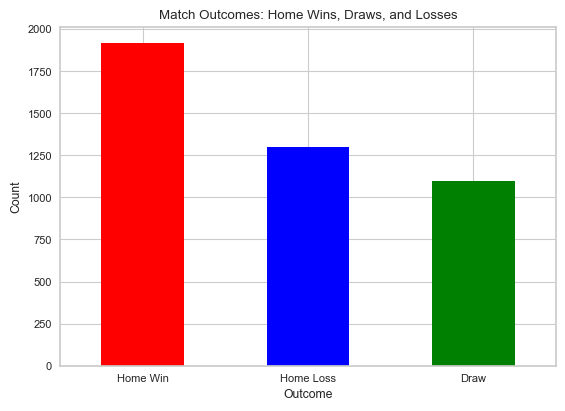

In [935]:
df_clean['Outcome'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Match Outcomes: Home Wins, Draws, and Losses')
plt.xticks(ticks=[0, 1, 2], labels=['Home Win', 'Home Loss', 'Draw'], rotation = 0)
plt.show()

In [936]:
total_matches = len(df_tot)
home_wins = len(df_tot[df_tot['Outcome'] == 2])
home_losses = len(df_tot[df_tot['Outcome'] == 0])
draws = len(df_tot[df_tot['Outcome'] == 1])

print(f"Proportion of Home Wins: {home_wins / total_matches:.2%}")
print(f"Proportion of Home Losses: {home_losses / total_matches:.2%}")
print(f"Proportion of Draws: {draws / total_matches:.2%}")

Proportion of Home Wins: 44.39%
Proportion of Home Losses: 30.19%
Proportion of Draws: 25.42%


In [937]:
contingency_table = [
    [home_wins, total_matches - home_wins],
    [home_losses, total_matches - home_losses],
    [draws, total_matches - draws],
]

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")
if p < 0.05:
    print("Significant correlation: Home advantage exists.")
else:
    print("No significant correlation: Home advantage is not strong.")

Chi-Squared Statistic: 380.1454252131828
P-Value: 2.8344562275291274e-83
Significant correlation: Home advantage exists.


### Plotting the Distirbution of the Goal Difference (Home - Away)

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\2504254555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tot['Year'] = df_tot['Date'].dt.year


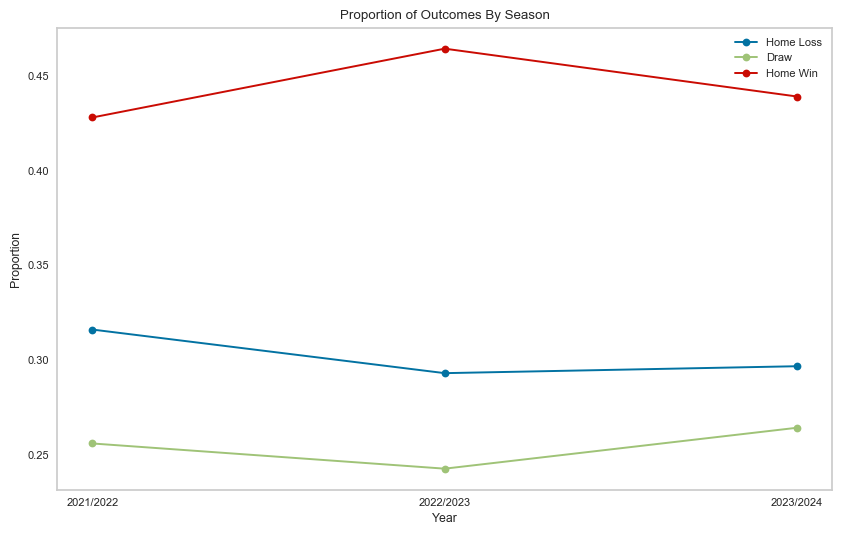

In [939]:
df_tot['Year'] = df_tot['Date'].dt.year

outcome_by_year = df_tot.groupby('Season')['Outcome'].value_counts(normalize=True).unstack()

outcome_by_year.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Proportion of Outcomes By Season')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(['Home Loss', 'Draw', 'Home Win'])
plt.grid()
plt.show()

In [940]:
df_tot[['Home score', 'Away score']]=df_tot['Score'].str.extract(r'(\d+)–(\d+)')

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\1949937754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tot[['Home score', 'Away score']]=df_tot['Score'].str.extract(r'(\d+)–(\d+)')
C:\Users\schue\AppData\Local\Temp\ipykernel_32380\1949937754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tot[['Home score', 'Away score']]=df_tot['Score'].str.extract(r'(\d+)–(\d+)')


C:\Users\schue\AppData\Local\Temp\ipykernel_32380\4119520845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tot['Goal Difference'] = df_tot['Home score'].astype(float) - df_tot['Away score'].astype(float)


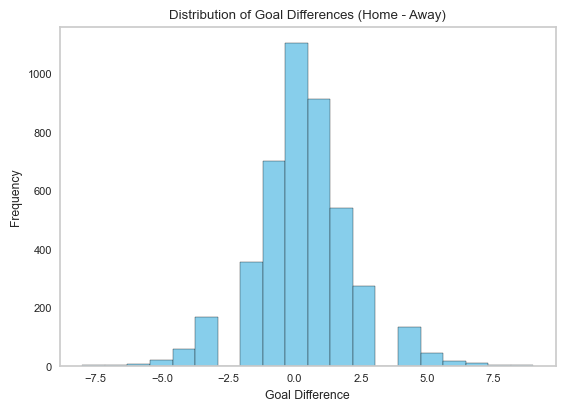

In [941]:
df_tot['Goal Difference'] = df_tot['Home score'].astype(float) - df_tot['Away score'].astype(float)

# Histogram of goal differences
df_tot['Goal Difference'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Goal Differences (Home - Away)')
plt.xlabel('Goal Difference')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Feature Selection Attempts

In [943]:
df_selection=df_tot.copy()
df_selection=df_selection.drop(columns=['Score', 'Home score', 'Away score', 'Season', 'Year', 'Goal Difference'], axis=1)
df_selection.head()

,Date,Home Team,Home XG,Away XG,Away Team,Outcome,Home_Tot_goals,Away_Tot_goals,Home_Tot_assists,Away_Tot_assists,...,Home_Tot_fouls,Away_Tot_fouls,Home_Tot_offsides,Away_Tot_offsides,Home_Tot_own_goals,Away_Tot_own_goals,Home_Tot_pens_conceded,Away_Tot_pens_conceded,Home_Tot_pens_won,Away_Tot_pens_won
0,2021-08-21,Inter,1.6,1.1,Genoa,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-08-21,Hellas Verona,2.4,1.6,Sassuolo,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-08-21,Torino,1.3,0.7,Atalanta,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-08-21,Empoli,1.2,1.5,Lazio,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-08-22,Bologna,1.6,1.5,Salernitana,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [944]:
df_selection['Date'] = pd.to_datetime(df_selection['Date'])
df_selection['Year'] = df_selection['Date'].dt.year
df_selection['Month'] = df_selection['Date'].dt.month
df_selection['Day'] = df_selection['Date'].dt.day

In [945]:
teams = pd.concat([df_selection['Home Team'], df_selection['Away Team']]).unique()
team_encoder = {team: idx for idx, team in enumerate(teams)}

df_selection['Home_Team_Encoded'] = df_selection['Home Team'].map(team_encoder)
df_selection['Away_Team_Encoded'] = df_selection['Away Team'].map(team_encoder)


In [946]:
df_encoded = df_selection.drop(['Home Team', 'Away Team', 'Date'], axis=1)

**Handling nan values**

In [948]:
data=df_encoded.copy()

In [949]:
data=data.drop(columns=['Home XG','Away XG' ], axis=1)
data.head()

,Outcome,Home_Tot_goals,Away_Tot_goals,Home_Tot_assists,Away_Tot_assists,Home_Tot_pens_made,Away_Tot_pens_made,Home_Tot_pens_att,Away_Tot_pens_att,Home_Tot_shots,...,Away_Tot_own_goals,Home_Tot_pens_conceded,Away_Tot_pens_conceded,Home_Tot_pens_won,Away_Tot_pens_won,Year,Month,Day,Home_Team_Encoded,Away_Team_Encoded
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2021,8,21,0,15
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2021,8,21,1,14
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2021,8,21,2,10
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2021,8,21,3,11
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2021,8,22,4,17


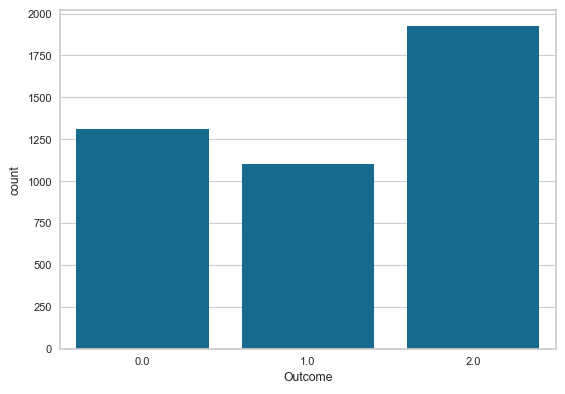

In [950]:
sns.countplot(x="Outcome", data=data)
plt.show()

In [951]:
corr_matrix = data.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                             1.000000
Home_Tot_passes_completed           0.246438
Home_Tot_passes_total_distance      0.246288
Home_Tot_passes_into_final_third    0.243812
Home_Tot_passes_live                0.243441
                                      ...   
Away_Tot_passes_received           -0.270644
Away_Tot_passes_total_distance     -0.271286
Away_Tot_passes_completed_medium   -0.271859
Away_Tot_passes_into_final_third   -0.271889
Away_Tot_passes_completed          -0.276155
Name: Outcome, Length: 196, dtype: float64

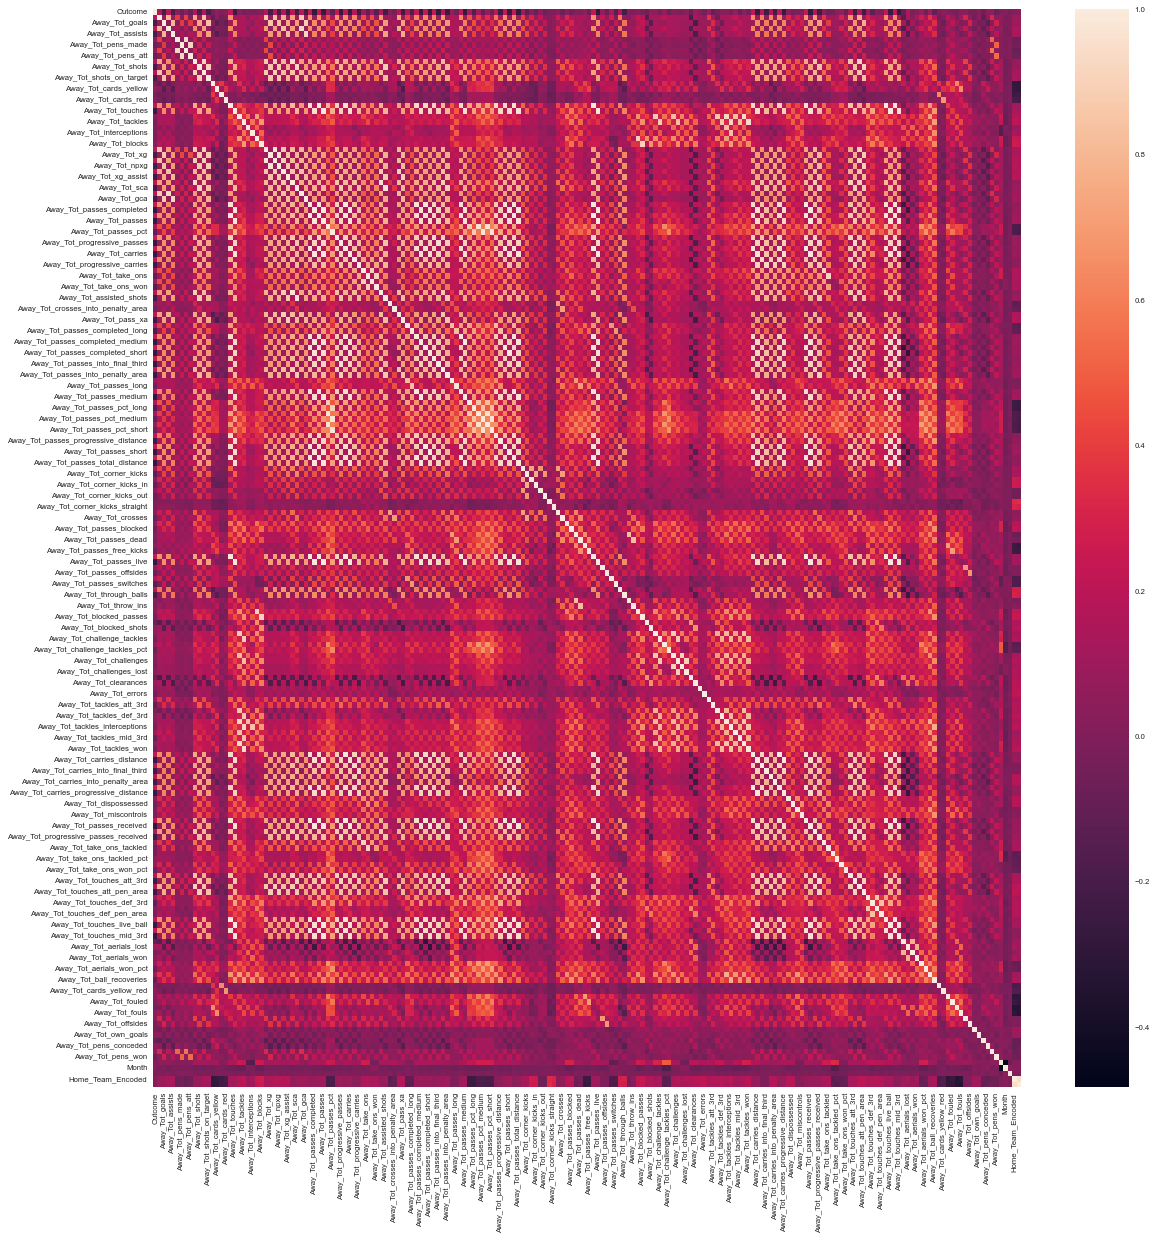

In [952]:

plt.figure(figsize=(20,20), dpi=70)
sns.heatmap(corr_matrix)
plt.show()

In [953]:
features=[col for col in data.columns if col != 'Outcome']

data_X=data[features]
data_y=data['Outcome']


In [954]:
X_scaled=pd.DataFrame(preprocessing.scale(data_X), columns=data_X.columns)
#X_scaled=X_scaled.dropna()
X_scaled.head()

,Home_Tot_goals,Away_Tot_goals,Home_Tot_assists,Away_Tot_assists,Home_Tot_pens_made,Away_Tot_pens_made,Home_Tot_pens_att,Away_Tot_pens_att,Home_Tot_shots,Away_Tot_shots,...,Away_Tot_own_goals,Home_Tot_pens_conceded,Away_Tot_pens_conceded,Home_Tot_pens_won,Away_Tot_pens_won,Year,Month,Day,Home_Team_Encoded,Away_Team_Encoded
0,-2.290518,-2.243156,-2.07014,-2.0307,-1.055535,-1.045263,-1.151067,-1.114471,-3.953765,-3.958452,...,-0.652697,-1.202375,-1.142885,-1.085644,-1.060471,-1.604463,0.457934,0.616169,-1.630965,-1.090520
1,-2.290518,-2.243156,-2.07014,-2.0307,-1.055535,-1.045263,-1.151067,-1.114471,-3.953765,-3.958452,...,-0.652697,-1.202375,-1.142885,-1.085644,-1.060471,-1.604463,0.457934,0.616169,-1.594958,-1.126520
2,-2.290518,-2.243156,-2.07014,-2.0307,-1.055535,-1.045263,-1.151067,-1.114471,-3.953765,-3.958452,...,-0.652697,-1.202375,-1.142885,-1.085644,-1.060471,-1.604463,0.457934,0.616169,-1.558951,-1.270522
3,-2.290518,-2.243156,-2.07014,-2.0307,-1.055535,-1.045263,-1.151067,-1.114471,-3.953765,-3.958452,...,-0.652697,-1.202375,-1.142885,-1.085644,-1.060471,-1.604463,0.457934,0.616169,-1.522944,-1.234522
4,-2.290518,-2.243156,-2.07014,-2.0307,-1.055535,-1.045263,-1.151067,-1.114471,-3.953765,-3.958452,...,-0.652697,-1.202375,-1.142885,-1.085644,-1.060471,-1.604463,0.457934,0.730025,-1.486937,-1.018519


### Model before feature selection

In [956]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=42)

In [957]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [958]:
param_grid = {'max_depth': range(5, 10)}


grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_depth=grid_search.best_params_['max_depth']

print("Best max_depth:", grid_search.best_params_['max_depth'])

print("Best cross-validated accuracy:", grid_search.best_score_)

Best max_depth: 5
Best cross-validated accuracy: 0.49292139946241226


In [959]:
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=best_depth)
model_DT=decision_tree.fit(X_train, y_train)
model_DT

DecisionTreeClassifier(max_depth=5, random_state=42)

In [960]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2., 0., 2., ..., 2., 0., 2.])

In [961]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

In [962]:
accuracy

0.4969278033794163

<Axes: >

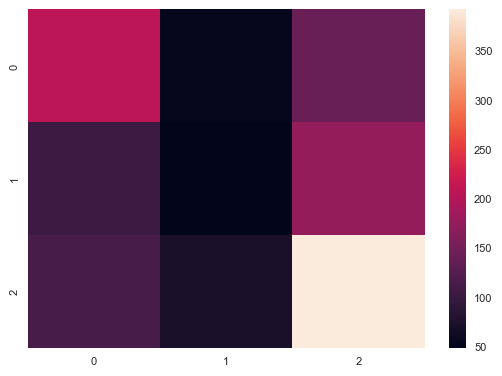

In [963]:
sns.heatmap(conf_matrix)

In [964]:
class_report=pd.DataFrame(class_report)
class_report.head()

,0.0,1.0,2.0,accuracy,macro avg,weighted avg
precision,0.490521,0.279070,0.553672,0.496928,0.441088,0.465515
recall,0.517500,0.147239,0.680556,0.496928,0.448432,0.496928
f1-score,0.503650,0.192771,0.610592,0.496928,0.435671,0.473121
support,400.000000,326.000000,576.000000,0.496928,1302.000000,1302.000000


The model better performs in finding the winning outcome. However, accuracy is pretty low. We can try to perform feature selection trough PCA, GridSearch or L1 based feature selection (here). A secod approach is using feature engineer and analize that dataset directly

**Importances**

Text(0.5, 0, 'Relative Importance')

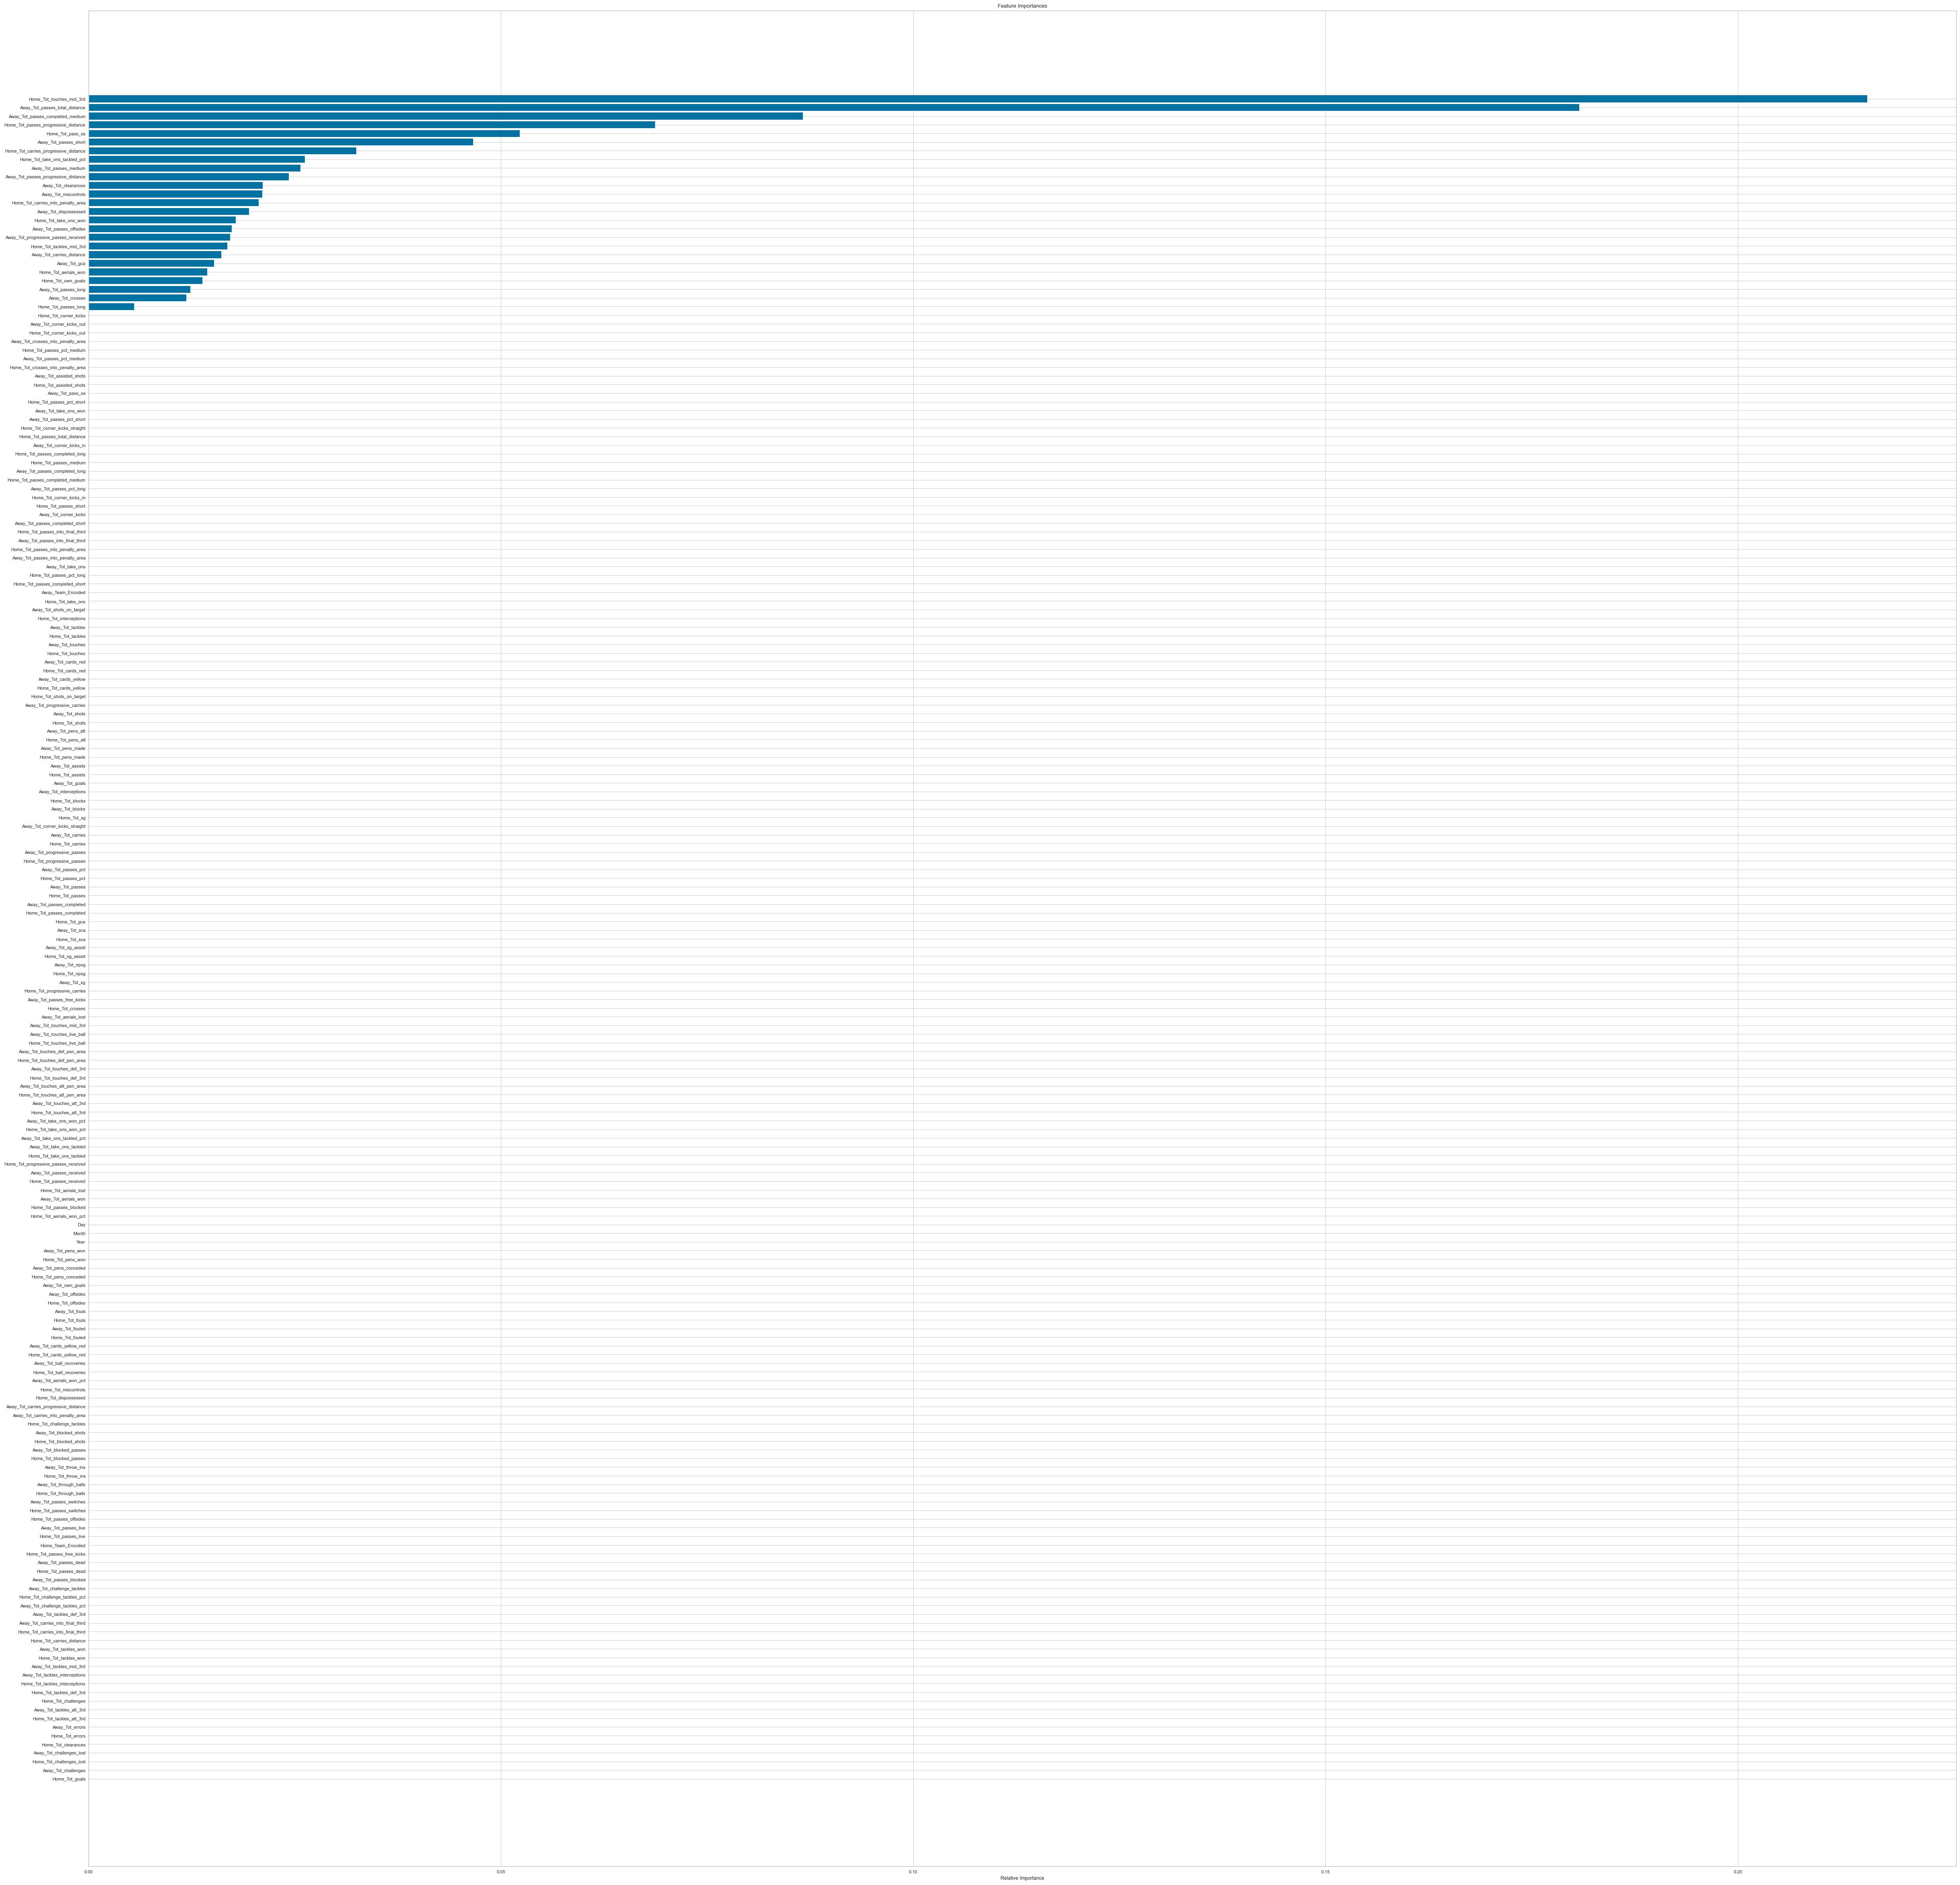

In [967]:
importances=model_DT.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(60,60))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array(features)[indices])
plt.xlabel('Relative Importance')

In [968]:
indices = np.argsort(importances)[::-1]
important_features = [(features[i], importances[i]) for i in indices if importances[i] > 0]
important_features

[('Home_Tot_touches_mid_3rd', 0.21569443866274488),
 ('Away_Tot_passes_total_distance', 0.1807799872045164),
 ('Away_Tot_passes_completed_medium', 0.08661537796357277),
 ('Home_Tot_passes_progressive_distance', 0.06871825862985538),
 ('Home_Tot_pass_xa', 0.05226183964352528),
 ('Away_Tot_passes_short', 0.04661441949555342),
 ('Home_Tot_carries_progressive_distance', 0.03244446972247088),
 ('Home_Tot_take_ons_tackled_pct', 0.02621339036122452),
 ('Away_Tot_passes_medium', 0.025700434106655165),
 ('Away_Tot_passes_progressive_distance', 0.02429349132591822),
 ('Away_Tot_clearances', 0.021101153102361436),
 ('Away_Tot_miscontrols', 0.021061545966877687),
 ('Home_Tot_carries_into_penalty_area', 0.020626110704788325),
 ('Away_Tot_dispossessed', 0.019472565944333848),
 ('Home_Tot_take_ons_won', 0.017873443563075474),
 ('Away_Tot_passes_offsides', 0.017346025984841418),
 ('Away_Tot_progressive_passes_received', 0.01716294711428083),
 ('Home_Tot_tackles_mid_3rd', 0.01684634191225848),
 ('Away_

In [969]:
threshold = 0.01
selected_features = [features[i] for i in indices if importances[i] > threshold]
selected_features

['Home_Tot_touches_mid_3rd',
 'Away_Tot_passes_total_distance',
 'Away_Tot_passes_completed_medium',
 'Home_Tot_passes_progressive_distance',
 'Home_Tot_pass_xa',
 'Away_Tot_passes_short',
 'Home_Tot_carries_progressive_distance',
 'Home_Tot_take_ons_tackled_pct',
 'Away_Tot_passes_medium',
 'Away_Tot_passes_progressive_distance',
 'Away_Tot_clearances',
 'Away_Tot_miscontrols',
 'Home_Tot_carries_into_penalty_area',
 'Away_Tot_dispossessed',
 'Home_Tot_take_ons_won',
 'Away_Tot_passes_offsides',
 'Away_Tot_progressive_passes_received',
 'Home_Tot_tackles_mid_3rd',
 'Away_Tot_carries_distance',
 'Away_Tot_gca',
 'Home_Tot_aerials_won',
 'Home_Tot_own_goals',
 'Away_Tot_passes_long',
 'Away_Tot_crosses']

### Approach 1: PCA no rotation

In [971]:
df_pca = FactorAnalyzer(n_factors=len(data_X),
                                          rotation=None,
                                          method='principal').fit(data_X)

In [972]:
def get_loadings_communalities(pca,round_dig=2,index_names=None):
    df2 = pd.DataFrame(
      pca.loadings_,
      index=index_names if index_names else [f'q{i}' for i in range(1,1+pca.loadings_.shape[0])],
      columns=[f'RC{i}' for i in range(1,1+pca.loadings_.shape[1])] if pca.rotation else [f'PC{i}' for i in range(1,1+pca.loadings_.shape[1])]
      )
    if pca.rotation:
        df2['communalities']=pca.get_communalities()
    df2=df2.round(3)
    return  df2

In [973]:
get_loadings_communalities(df_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195
q1,0.501,-0.508,-0.315,0.128,0.041,0.122,0.148,-0.032,-0.094,-0.121,...,-0.0,-0.0,-0.001,0.187,0.043,0.135,-0.049,-0.004,0.135,0.224
q2,0.473,0.525,-0.305,-0.135,0.081,0.193,-0.119,-0.024,-0.155,-0.064,...,-0.0,0.0,0.004,0.157,0.257,-0.015,-0.074,0.178,0.199,0.109
q3,0.485,-0.493,-0.300,0.103,0.074,0.090,0.109,-0.048,-0.077,-0.103,...,0.0,-0.0,-0.039,0.065,0.015,0.137,-0.054,0.017,0.086,0.216
q4,0.450,0.496,-0.299,-0.111,0.113,0.159,-0.091,-0.065,-0.093,-0.067,...,-0.0,-0.0,-0.051,0.146,0.277,0.057,-0.036,0.159,0.190,0.106
q5,0.171,-0.167,-0.105,0.043,-0.141,0.155,0.166,-0.065,-0.181,-0.002,...,0.0,-0.0,0.101,0.169,0.015,0.091,0.011,-0.105,0.132,0.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
q191,0.245,-0.006,0.145,0.003,0.061,-0.283,-0.001,0.413,-0.397,-0.406,...,-0.0,0.0,0.092,0.128,0.213,-0.032,-0.031,0.055,0.108,0.167
q192,-0.080,-0.001,-0.073,0.003,-0.002,0.080,-0.042,-0.137,0.199,0.225,...,-0.0,-0.0,0.018,-0.005,-0.084,0.021,-0.085,0.008,0.002,-0.039
q193,-0.020,-0.020,-0.027,-0.003,-0.010,0.015,-0.005,-0.032,0.035,0.035,...,0.0,0.0,-0.061,-0.055,0.037,-0.132,-0.043,0.033,-0.014,0.045
q194,0.121,0.023,-0.103,0.143,0.813,-0.025,-0.005,-0.076,0.103,0.090,...,0.0,0.0,-0.214,-0.254,0.069,-0.165,-0.091,0.273,0.019,0.272


In [974]:
def get_summary(pca,round_dig=2):
    return pd.DataFrame(
      [pca.get_factor_variance()[0],
       pca.get_factor_variance()[1],
       pca.get_factor_variance()[2]],
       #columns=['PC{}'.format(i) for i in
                #range(1,1+len(pca.get_factor_variance()[0]))],
      columns=data_X.columns,
      index=['Sum of Squares Loadings','Proportion of Variance Explained',
             'Cumulative Proportion']
            ).round(round_dig)

pca_summary=get_summary(df_pca)
pca_summary

,Home_Tot_goals,Away_Tot_goals,Home_Tot_assists,Away_Tot_assists,Home_Tot_pens_made,Away_Tot_pens_made,Home_Tot_pens_att,Away_Tot_pens_att,Home_Tot_shots,Away_Tot_shots,...,Away_Tot_own_goals,Home_Tot_pens_conceded,Away_Tot_pens_conceded,Home_Tot_pens_won,Away_Tot_pens_won,Year,Month,Day,Home_Team_Encoded,Away_Team_Encoded
Sum of Squares Loadings,54.18,29.19,14.70,8.25,7.19,4.06,3.92,3.24,2.96,2.92,...,0.0,0.0,2.06,7.10,4.95,1.35,3.15,2.43,17.37,7.60
Proportion of Variance Explained,0.28,0.15,0.08,0.04,0.04,0.02,0.02,0.02,0.02,0.01,...,0.0,0.0,0.01,0.04,0.03,0.01,0.02,0.01,0.09,0.04
Cumulative Proportion,0.28,0.43,0.50,0.55,0.58,0.60,0.62,0.64,0.65,0.67,...,1.0,1.0,1.01,1.05,1.07,1.08,1.10,1.11,1.20,1.24


In [975]:
ssl=pca_summary.loc['Sum of Squares Loadings']
n_factors=len(ssl[ssl >1])
n_factors

36

In [976]:
cols_pca=ssl[ssl >1].index

In [977]:
cumprop=pca_summary.loc['Cumulative Proportion']
len(cumprop[cumprop>0.8])

169

Text(0, 0.5, 'Variance')

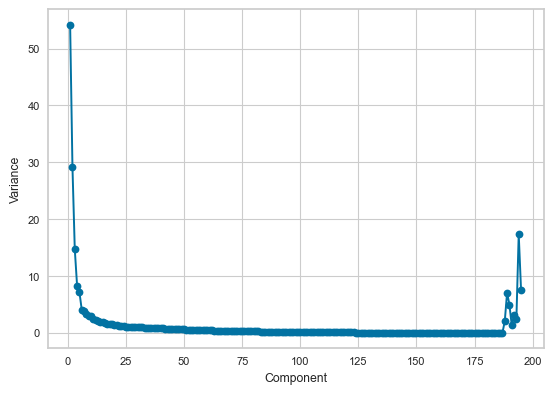

In [978]:
import matplotlib.pyplot as plt
plt.plot(1+np.arange(len(df_pca.get_factor_variance()[0])),
         df_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

We can use features extracted from the PCA analysis to fit the model, though this method leads to loss of information.

In [980]:
X_train_pca=X_train[cols_pca]
X_test_pca=X_test[cols_pca]

In [981]:
decision_tree_pca = DecisionTreeClassifier(random_state=42)

In [982]:
param_grid = {'max_depth': range(4, 10)}


grid_search = GridSearchCV(decision_tree_pca, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

best_depth_pca=grid_search.best_params_['max_depth']
print("Best max_depth:", grid_search.best_params_['max_depth'])

# Best score
print("Best cross-validated accuracy:", grid_search.best_score_)

Best max_depth: 4
Best cross-validated accuracy: 0.5080578557183733


In [983]:
decision_tree_pca = DecisionTreeClassifier(random_state=42, max_depth=best_depth_pca )
model_pca=decision_tree_pca.fit(X_train_pca, y_train)
model_pca

DecisionTreeClassifier(max_depth=4, random_state=42)

In [984]:
y_pred_pca = decision_tree_pca.predict(X_test_pca)

In [985]:
accuracy = accuracy_score(y_test, y_pred_pca)
conf_matrix = confusion_matrix(y_test, y_pred_pca)
class_report = classification_report(y_test, y_pred_pca, output_dict=True, zero_division=0)

In [986]:
accuracy

0.5099846390168971

<Axes: >

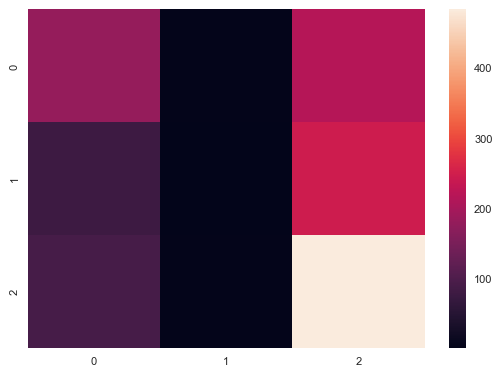

In [987]:
sns.heatmap(conf_matrix)

Even with these selecting methods, the model doesn't seem to improve much and it struggles in identifying draws.

### Approach 2: Feature selection using L1-based feature selection

In [990]:
data_X.shape

(4339, 195)

In [991]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter=100000).fit(data_X, data_y)
model_lsvc = SelectFromModel(lsvc, prefit=True)
X_new = model_lsvc.transform(data_X)
X_new.shape

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(4339, 116)

The raw dataset is too large to extract meaningful columns, as liblinear failed to converge. The better option is to perform feature engineering by computing relevant metrics from the raw dataset and using them as features, keeping the encoded teams / dates and expected goals.

As the model accuracy is pretty low, we perform the analysis extracting metrics from raw data that can help detereminign the outcome.

# Feature Engineering (New Approach)

## Get the Dataset and prepare it

In [995]:
matches_data.head(3)

,Date,Home Team,Home XG,Score,Away XG,Away Team,Attendance,Outcome,Home_Tot_goals,Away_Tot_goals,...,Home_Five_own_goals,Away_Five_own_goals,Home_Tot_pens_conceded,Away_Tot_pens_conceded,Home_Five_pens_conceded,Away_Five_pens_conceded,Home_Tot_pens_won,Away_Tot_pens_won,Home_Five_pens_won,Away_Five_pens_won
0,2021-08-21,Inter,1.6,4–0,1.1,Genoa,"27,402",2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-08-21,Hellas Verona,2.4,2–3,1.6,Sassuolo,"5,448",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-08-21,Torino,1.3,1–2,0.7,Atalanta,"3,475",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [996]:
matches_data["Date"] = pd.to_datetime(matches_data["Date"])

In [997]:
matches_data = matches_data.sort_values(by='Date', ascending=True)

In [998]:
matches_data = matches_data[matches_data['Date'] >= '2023-01-01']

In [999]:
# Normalize each column's data
for column in matches_data.iloc[:,8:389].columns:
    matches_data[column] = (matches_data[column] - matches_data[column].mean()) / matches_data[column].std()

## Performing the Feature Engineering

### Finding aggregate Offense stats

In [1002]:
# Home Offense
home_offense_data = matches_data[['Outcome', 'Home_Tot_goals', 'Home_Tot_assists', 'Home_Tot_pens_made', 'Home_Tot_pens_att', 'Home_Tot_shots', 'Home_Tot_shots_on_target', 'Home_Tot_xg', 'Home_Tot_npxg', 'Home_Tot_xg_assist', 'Home_Tot_sca', 'Home_Tot_gca', 'Home_Tot_assisted_shots', 'Home_Tot_crosses_into_penalty_area', 'Home_Tot_pass_xa', 'Home_Tot_passes_into_penalty_area', 'Home_Tot_corner_kicks', 'Home_Tot_corner_kicks_in', 'Home_Tot_corner_kicks_out', 'Home_Tot_corner_kicks_straight', 'Home_Tot_crosses', 'Home_Tot_tackles_att_3rd', 'Home_Tot_carries_into_penalty_area', 'Home_Tot_take_ons_tackled', 'Home_Tot_take_ons_tackled_pct', 'Home_Tot_take_ons_won_pct', 'Home_Tot_take_ons_won', 'Home_Tot_take_ons', 'Home_Tot_touches_att_pen_area', 'Home_Tot_offsides', 'Home_Tot_pens_won']]
home_offense_corr = home_offense_data.corr()
home_offense_corrs = home_offense_corr[abs(home_offense_corr["Outcome"])>0.2]['Outcome'].sort_values(ascending=False)
home_offense_corrs = home_offense_corrs.drop('Outcome')
home_offense_weights = home_offense_corrs / home_offense_corrs.sum()
matches_data['home_offense_stat'] = (matches_data[home_offense_weights.index] * home_offense_weights).sum(axis=1)
home_offense_weights.index = [name.replace("Tot", "Five") for name in home_offense_weights.index]
matches_data['home_offense_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in home_offense_weights.index]] * home_offense_weights).sum(axis=1)
#matches_data['home_offense_stat']
#home_offense_corrs

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\2532824022.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['home_offense_stat'] = (matches_data[home_offense_weights.index] * home_offense_weights).sum(axis=1)
C:\Users\schue\AppData\Local\Temp\ipykernel_32380\2532824022.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['home_offense_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in home_offense_weights.index]] * home_offense_weights).sum(axis=1)


In [1003]:
# Away Offense
away_offense_data = matches_data[['Outcome', 'Away_Tot_goals', 'Away_Tot_assists', 'Away_Tot_pens_made', 'Away_Tot_pens_att', 'Away_Tot_shots', 'Away_Tot_shots_on_target', 'Away_Tot_xg', 'Away_Tot_npxg', 'Away_Tot_xg_assist', 'Away_Tot_sca', 'Away_Tot_gca', 'Away_Tot_assisted_shots', 'Away_Tot_crosses_into_penalty_area', 'Away_Tot_pass_xa', 'Away_Tot_passes_into_penalty_area', 'Away_Tot_corner_kicks', 'Away_Tot_corner_kicks_in', 'Away_Tot_corner_kicks_out', 'Away_Tot_corner_kicks_straight', 'Away_Tot_crosses', 'Away_Tot_tackles_att_3rd', 'Away_Tot_carries_into_penalty_area', 'Away_Tot_take_ons_tackled', 'Away_Tot_take_ons_tackled_pct', 'Away_Tot_take_ons_won_pct', 'Away_Tot_take_ons_won', 'Away_Tot_take_ons', 'Away_Tot_touches_att_pen_area', 'Away_Tot_offsides', 'Away_Tot_pens_won']]
away_offense_corr = away_offense_data.corr()
away_offense_corrs = away_offense_corr[abs(away_offense_corr["Outcome"])>0.2]['Outcome'].sort_values(ascending=False)
away_offense_corrs = away_offense_corrs.drop('Outcome')
away_offense_weights = away_offense_corrs / away_offense_corrs.sum()
matches_data['away_offense_stat'] = (matches_data[away_offense_weights.index] * away_offense_weights).sum(axis=1)
away_offense_weights.index = [name.replace("Tot", "Five") for name in away_offense_weights.index]
matches_data['away_offense_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in away_offense_weights.index]] * away_offense_weights).sum(axis=1)

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\1302837955.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['away_offense_stat'] = (matches_data[away_offense_weights.index] * away_offense_weights).sum(axis=1)
C:\Users\schue\AppData\Local\Temp\ipykernel_32380\1302837955.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['away_offense_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in away_offense_weights.index]] * away_offense_weights).sum(axis=1)


### Finding aggregate Midfield stats

In [1005]:
# Home Midfield
home_midfield_data = matches_data[['Outcome', 'Home_Tot_touches', 'Home_Tot_passes_completed', 'Home_Tot_passes', 'Home_Tot_passes_pct', 'Home_Tot_progressive_passes', 'Home_Tot_carries', 'Home_Tot_progressive_carries', 'Home_Tot_passes_completed_long', 'Home_Tot_passes_completed_medium', 'Home_Tot_passes_completed_short', 'Home_Tot_passes_into_final_third', 'Home_Tot_passes_long', 'Home_Tot_passes_medium', 'Home_Tot_passes_pct_long', 'Home_Tot_passes_pct_medium', 'Home_Tot_passes_pct_short', 'Home_Tot_passes_progressive_distance', 'Home_Tot_passes_short', 'Home_Tot_passes_total_distance', 'Home_Tot_blocked_passes', 'Home_Tot_passes_dead', 'Home_Tot_passes_free_kicks', 'Home_Tot_passes_live', 'Home_Tot_passes_offsides', 'Home_Tot_passes_switches', 'Home_Tot_through_balls', 'Home_Tot_throw_ins', 'Home_Tot_blocked_shots', 'Home_Tot_carries_distance', 'Home_Tot_carries_into_final_third', 'Home_Tot_carries_progressive_distance', 'Home_Tot_dispossessed', 'Home_Tot_miscontrols', 'Home_Tot_passes_received', 'Home_Tot_progressive_passes_received', 'Home_Tot_touches_att_3rd', 'Home_Tot_touches_def_3rd', 'Home_Tot_touches_live_ball', 'Home_Tot_touches_mid_3rd', 'Home_Tot_aerials_lost', 'Home_Tot_aerials_won', 'Home_Tot_aerials_won_pct', 'Home_Tot_fouled']]
home_midfield_corr = home_midfield_data.corr()
home_midfield_corrs = home_midfield_corr[abs(home_midfield_corr["Outcome"])>0.2]['Outcome'].sort_values(ascending=False)
home_midfield_corrs = home_midfield_corrs.drop('Outcome')
home_midfield_weights = home_midfield_corrs / home_midfield_corrs.sum()
matches_data['home_midfield_stat'] = (matches_data[home_midfield_weights.index] * home_midfield_weights).sum(axis=1)
home_midfield_weights.index = [name.replace("Tot", "Five") for name in home_midfield_weights.index]
matches_data['home_midfield_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in home_midfield_weights.index]] * home_midfield_weights).sum(axis=1)

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\305982484.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['home_midfield_stat'] = (matches_data[home_midfield_weights.index] * home_midfield_weights).sum(axis=1)
C:\Users\schue\AppData\Local\Temp\ipykernel_32380\305982484.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['home_midfield_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in home_midfield_weights.index]] * home_midfield_weights).sum(axis=1)


In [1006]:
# Away Midfield
away_midfield_data = matches_data[['Outcome', 'Away_Tot_touches', 'Away_Tot_passes_completed', 'Away_Tot_passes', 'Away_Tot_passes_pct', 'Away_Tot_progressive_passes', 'Away_Tot_carries', 'Away_Tot_progressive_carries', 'Away_Tot_passes_completed_long', 'Away_Tot_passes_completed_medium', 'Away_Tot_passes_completed_short', 'Away_Tot_passes_into_final_third', 'Away_Tot_passes_long', 'Away_Tot_passes_medium', 'Away_Tot_passes_pct_long', 'Away_Tot_passes_pct_medium', 'Away_Tot_passes_pct_short', 'Away_Tot_passes_progressive_distance', 'Away_Tot_passes_short', 'Away_Tot_passes_total_distance', 'Away_Tot_blocked_passes', 'Away_Tot_passes_dead', 'Away_Tot_passes_free_kicks', 'Away_Tot_passes_live', 'Away_Tot_passes_offsides', 'Away_Tot_passes_switches', 'Away_Tot_through_balls', 'Away_Tot_throw_ins', 'Away_Tot_blocked_shots', 'Away_Tot_carries_distance', 'Away_Tot_carries_into_final_third', 'Away_Tot_carries_progressive_distance', 'Away_Tot_dispossessed', 'Away_Tot_miscontrols', 'Away_Tot_passes_received', 'Away_Tot_progressive_passes_received', 'Away_Tot_touches_att_3rd', 'Away_Tot_touches_def_3rd', 'Away_Tot_touches_live_ball', 'Away_Tot_touches_mid_3rd', 'Away_Tot_aerials_lost', 'Away_Tot_aerials_won', 'Away_Tot_aerials_won_pct', 'Away_Tot_fouled']]
away_midfield_corr = away_midfield_data.corr()
away_midfield_corrs = away_midfield_corr[abs(away_midfield_corr["Outcome"])>0.2]['Outcome'].sort_values(ascending=False)
away_midfield_corrs = away_midfield_corrs.drop('Outcome')
away_midfield_weights = away_midfield_corrs / away_midfield_corrs.sum()
matches_data['away_midfield_stat'] = (matches_data[away_midfield_weights.index] * away_midfield_weights).sum(axis=1)
away_midfield_weights.index = [name.replace("Tot", "Five") for name in away_midfield_weights.index]
matches_data['away_midfield_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in away_midfield_weights.index]] * away_midfield_weights).sum(axis=1)

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\4124885096.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['away_midfield_stat'] = (matches_data[away_midfield_weights.index] * away_midfield_weights).sum(axis=1)
C:\Users\schue\AppData\Local\Temp\ipykernel_32380\4124885096.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['away_midfield_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in away_midfield_weights.index]] * away_midfield_weights).sum(axis=1)


### Finding aggregate Defense Stats

In [1008]:
# Home Defense
home_defense_data = matches_data[['Outcome', 'Home_Tot_tackles', 'Home_Tot_interceptions', 'Home_Tot_blocks', 'Home_Tot_cards_yellow', 'Home_Tot_cards_red', 'Home_Tot_passes_blocked', 'Home_Tot_challenge_tackles', 'Home_Tot_challenge_tackles_pct', 'Home_Tot_challenges', 'Home_Tot_challenges_lost', 'Home_Tot_clearances', 'Home_Tot_errors', 'Home_Tot_tackles_def_3rd', 'Home_Tot_tackles_interceptions', 'Home_Tot_tackles_mid_3rd', 'Home_Tot_tackles_won', 'Home_Tot_touches_def_pen_area', 'Home_Tot_ball_recoveries', 'Home_Tot_cards_yellow_red', 'Home_Tot_fouls', 'Home_Tot_own_goals', 'Home_Tot_pens_conceded']]
home_defense_corr = home_defense_data.corr()
home_defense_corrs = home_defense_corr[abs(home_defense_corr["Outcome"])>0.05]['Outcome'].sort_values(ascending=False)
home_defense_corrs = home_defense_corrs.drop('Outcome')
home_defense_weights = home_defense_corrs / home_defense_corrs.sum()
matches_data['home_defense_stat'] = (matches_data[home_defense_weights.index] * home_defense_weights).sum(axis=1)
home_defense_weights.index = [name.replace("Tot", "Five") for name in home_defense_weights.index]
matches_data['home_defense_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in home_defense_weights.index]] * home_defense_weights).sum(axis=1)

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\841158840.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['home_defense_stat'] = (matches_data[home_defense_weights.index] * home_defense_weights).sum(axis=1)
C:\Users\schue\AppData\Local\Temp\ipykernel_32380\841158840.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['home_defense_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in home_defense_weights.index]] * home_defense_weights).sum(axis=1)


In [1009]:
# Away Defense
away_defense_data = matches_data[['Outcome', 'Away_Tot_tackles', 'Away_Tot_interceptions', 'Away_Tot_blocks', 'Away_Tot_cards_yellow', 'Away_Tot_cards_red', 'Away_Tot_passes_blocked', 'Away_Tot_challenge_tackles', 'Away_Tot_challenge_tackles_pct', 'Away_Tot_challenges', 'Away_Tot_challenges_lost', 'Away_Tot_clearances', 'Away_Tot_errors', 'Away_Tot_tackles_def_3rd', 'Away_Tot_tackles_interceptions', 'Away_Tot_tackles_mid_3rd', 'Away_Tot_tackles_won', 'Away_Tot_touches_def_pen_area', 'Away_Tot_ball_recoveries', 'Away_Tot_cards_yellow_red', 'Away_Tot_fouls', 'Away_Tot_own_goals', 'Away_Tot_pens_conceded']]
away_defense_corr = away_defense_data.corr()
away_defense_corrs = away_defense_corr[abs(away_defense_corr["Outcome"])>0.05]['Outcome'].sort_values(ascending=False)
away_defense_corrs = away_defense_corrs.drop('Outcome')
away_defense_weights = away_defense_corrs / away_defense_corrs.sum()
matches_data['away_defense_stat'] = (matches_data[away_defense_weights.index] * away_defense_weights).sum(axis=1)
away_defense_weights.index = [name.replace("Tot", "Five") for name in away_defense_weights.index]
matches_data['away_defense_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in away_defense_weights.index]] * away_defense_weights).sum(axis=1)

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\367694203.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['away_defense_stat'] = (matches_data[away_defense_weights.index] * away_defense_weights).sum(axis=1)
C:\Users\schue\AppData\Local\Temp\ipykernel_32380\367694203.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['away_defense_form'] = (matches_data[[col_name.replace("Tot", "Five") for col_name in away_defense_weights.index]] * away_defense_weights).sum(axis=1)


In [1010]:
# Make sure custom stats are normalized

for column in matches_data.iloc[:,-12:].columns:
    matches_data[column] = (matches_data[column] - matches_data[column].mean()) / matches_data[column].std()

### Add the win rate as only team-based metric

In [1012]:
def get_past_winrate(match_df, match, n_games=5):
    date = match['Date']
    home_team = match['Home Team']
    away_team = match['Away Team']
    match_d = match_df.copy()
    match_d = match_df[match_df['Date']<date]
    match_d = match_df.sort_values(by='Date', ascending=True)
    match_d = match_d[((match_d['Home Team'] == home_team) | (match_d['Home Team'] == away_team)) & ((match_d['Away Team'] == home_team) | (match_d['Away Team'] == away_team))]
    match_d = match_d.tail(n_games)
    n_matches = len(match_d)
    if n_matches == 0:
        win_rate = 0.5
        return win_rate
    else:
        n_wins = 0
        for _, game in match_d.iterrows():
            if game['Home Team'] == home_team:
                if game['Outcome'] == 2:
                    n_wins += 1
                elif game['Outcome'] == 1:
                    n_wins += 0.5
            elif game['Away Team'] == home_team:
                if game['Outcome'] == 0:
                    n_wins += 1
                elif game['Outcome'] == 1:
                    n_wins += 0.5
    win_rate = n_wins / n_matches
    return win_rate

In [1013]:
matches_data['Win Rate'] = matches_data.apply(lambda row: get_past_winrate(matches_data, row, n_games=5), axis=1)

C:\Users\schue\AppData\Local\Temp\ipykernel_32380\1226459086.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matches_data['Win Rate'] = matches_data.apply(lambda row: get_past_winrate(matches_data, row, n_games=5), axis=1)


# Exploratory Analysis, Engineered Dataset

## Analyze strongest teams in terms of stats

### Check for which team the offense stat is the highest (Home vs. Away)

In [1017]:
average_stats = matches_data.groupby('Home Team')['home_offense_stat'].mean().sort_values(ascending=False)

# Display the result
print(average_stats)

Home Team
Bayern Munich    2.806828
Liverpool        2.069509
Leverkusen       1.878028
Arsenal          1.795940
Barcelona        1.730227
                   ...   
Salernitana     -1.133617
Genoa           -1.199932
Las Palmas      -1.234072
Sampdoria       -1.331410
Sheffield Utd   -1.715681
Name: home_offense_stat, Length: 89, dtype: float64


In [1018]:
average_stats = matches_data.groupby('Away Team')['away_offense_stat'].mean().sort_values(ascending=False)

# Display the result
print(average_stats)

Away Team
Bayern Munich      2.666811
Liverpool          2.045938
Arsenal            1.949656
Manchester City    1.756003
Barcelona          1.677699
                     ...   
Elche             -1.146134
Genoa             -1.187873
Las Palmas        -1.191652
Sampdoria         -1.317932
Sheffield Utd     -1.553362
Name: away_offense_stat, Length: 89, dtype: float64


### Check which team wins the most games (Home and Away)

In [1020]:
average_stats = matches_data.groupby('Home Team')['Outcome'].mean().sort_values(ascending=False)
print(average_stats)

Home Team
Manchester City    1.827586
Real Madrid        1.741935
Atlético Madrid    1.741935
Liverpool          1.724138
Barcelona          1.666667
                     ...   
Salernitana        0.612903
Sheffield Utd      0.421053
Burnley            0.421053
Southampton        0.363636
Darmstadt 98       0.294118
Name: Outcome, Length: 89, dtype: float64


In [1021]:
average_stats = matches_data.groupby('Away Team')['Outcome'].mean().sort_values(ascending=True)
print(average_stats)

Away Team
Leverkusen         0.407407
Inter              0.466667
Manchester City    0.516129
Arsenal            0.586207
Barcelona          0.612903
                     ...   
Sampdoria          1.666667
Hertha BSC         1.700000
Leeds United       1.727273
Sheffield Utd      1.736842
Granada            1.842105
Name: Outcome, Length: 89, dtype: float64


### Show that the rankings are relatively similar

In [1023]:
from scipy.stats import spearmanr

# Assuming two metrics: 'home_offense_stat' and 'home_defense_stat'
rankings_metric1 = matches_data.groupby('Home Team')['home_offense_stat'].mean().rank(ascending=False)
rankings_metric2 = matches_data.groupby('Home Team')['Outcome'].mean().rank(ascending=False)

# Compute Spearman correlation
correlation, _ = spearmanr(rankings_metric1, rankings_metric2)

print(f"Spearman Rank Correlation: {correlation}")

Spearman Rank Correlation: 0.7337791481715652


In [1024]:
from scipy.stats import spearmanr

# Assuming two metrics: 'home_offense_stat' and 'home_defense_stat'
rankings_metric1 = matches_data.groupby('Home Team')['home_midfield_stat'].mean().rank(ascending=False)
rankings_metric2 = matches_data.groupby('Home Team')['Outcome'].mean().rank(ascending=False)

# Compute Spearman correlation
correlation, _ = spearmanr(rankings_metric1, rankings_metric2)

print(f"Spearman Rank Correlation: {correlation}")

Spearman Rank Correlation: 0.6671632764135048


# Import the Dataset (if necessary)

In [ ]:
# Import the training set if you don't want to run entire code (uncomment)
#matches_data = pd.read_csv('Final_Prediction_Set_v3.csv')
#matches_data = matches_data.iloc[:,1:]

# Run the Prediction Algorithms

In [1033]:
np.random.seed(100)

## Prepare Test and Training set to ensure consistency

In [1035]:
#Splitting up the dataset
train, test = train_test_split(matches_data, test_size = 0.2)

## Running Tests with Win Rate

In [1037]:
# With Win Rate
x_train = train.iloc[:,-13:]
y_train = train[['Outcome']]
x_test = test.iloc[:,-13:]
y_test = test[['Outcome']]

### Random Forest

#### Fitting the Model

In [1040]:
# Fitting the model
model_rf = RandomForestClassifier(n_estimators=50, max_depth = 4, min_samples_leaf=8, min_samples_split=8)

model_rf.fit(x_train,np.ravel(y_train))

RandomForestClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=50)

#### Evaluating the Model and improve for parameters

In [1042]:
# Getting the accuracy
model_rf.score(x_test,y_test)

0.6200873362445415

In [1043]:
# Getting the confusion matrix
y_pred = model_rf.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

array([[ 85,   9,  33],
       [ 36,  15,  70],
       [ 20,   6, 184]], dtype=int64)

In [1044]:
# Finding the best combination of hyperparamters using Grid Search

parameters = {
     'n_estimators':(20, 50,  100), #the number of trees
     'max_depth':(4,7,10),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12)
}

model_rf = GridSearchCV(RandomForestClassifier(),parameters,cv=3)

model_rf.fit(x_train, np.ravel(y_train))
model_rf.best_score_, model_rf.best_params_

(0.647921976872099,
 {'max_depth': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 2,
  'n_estimators': 50})

#### Find actual Accuracy via Simulation

In [1046]:
np.random.seed(100)
accuracies=[]
for i in range(5):
    # Split the data with a different random seed
    train, test = train_test_split(matches_data, test_size = 0.2)

    x_train = train.iloc[:,-13:]
    y_train = train[['Outcome']]
    x_test = test.iloc[:,-13:]
    y_test = test[['Outcome']]
    
    # Train and test the model
    model_rf.fit(x_train, np.ravel(y_train))
    y_pred = model_rf.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))
print(f"Average Accuracy: {np.mean(accuracies):.4f}")

Average Accuracy: 0.6410


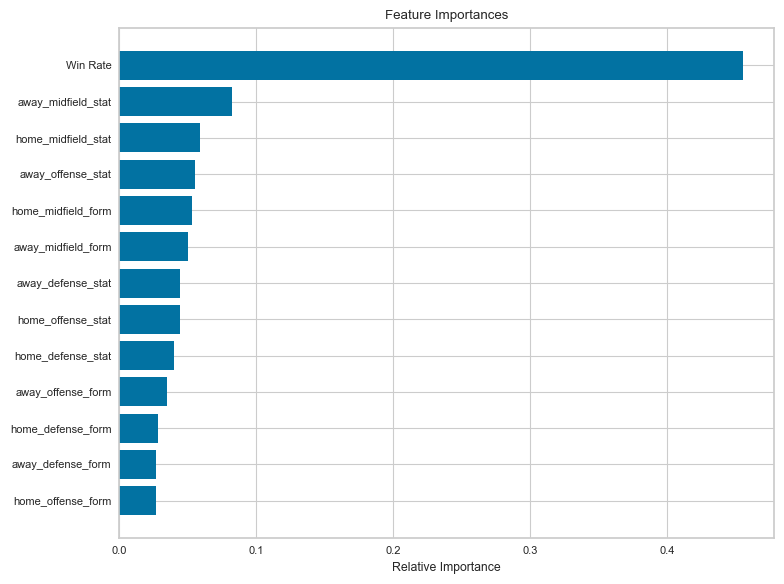

In [1047]:
best_rf_model = model_rf.best_estimator_
importances = best_rf_model.feature_importances_
feature_names = x_train.columns
indices = np.argsort(importances)
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), np.array(feature_names)[indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

### Neural Network

Base model

In [1050]:
baseline_mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=10000,
    random_state=42,
    early_stopping=True
)

baseline_mlp.fit(x_train, y_train)
print("Trained baseline MLPClassifier.")

y_pred_baseline = baseline_mlp.predict(x_test)
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred_baseline))

Trained baseline MLPClassifier.
Baseline Model Accuracy: 0.5524017467248908


C:\Users\schue\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning

In [1052]:
param_dist = {
    'hidden_layer_sizes': [
        (50,), (100,), (150,),
        (50, 50), (100, 50),
        (150, 100, 50), (200, 150, 100)
    ],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive', 'invscaling']
}

mlp = MLPClassifier(
    max_iter=1000000,
    random_state=42,
    early_stopping=True
)


grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_dist,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, np.ravel(y_train))
print("Best Parameters:", grid_search.best_params_)

optimized_mlp = grid_search.best_estimator_
optimized_mlp.fit(x_train, np.ravel(y_train))

y_pred_optimized = optimized_mlp.predict(x_test)
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_optimized))

Fitting 3 folds for each of 126 candidates, totalling 378 fits
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Optimized Model Accuracy: 0.6266375545851528


#### Find actual Accuracy via Simulation

In [1054]:
np.random.seed(100)
accuracies_nn=[]
for i in range(5):
    # Split the data with a different random seed
    train, test = train_test_split(matches_data, test_size = 0.2)

    x_train = train.iloc[:,-13:]
    y_train = train[['Outcome']]
    x_test = test.iloc[:,-13:]
    y_test = test[['Outcome']]
    
    # Train and test the model
    optimized_mlp.fit(x_train, np.ravel(y_train))
    y_pred = optimized_mlp.predict(x_test)
    accuracies_nn.append(accuracy_score(y_test, y_pred))
print(f"Average Accuracy: {np.mean(accuracies_nn):.4f}")

Average Accuracy: 0.6328


Confusion Matrix

In [1058]:
cfm_optimized = confusion_matrix(y_test, y_pred_optimized)
cfm_optimized

array([[ 45,  14,  79],
       [ 36,   9,  71],
       [ 63,  25, 116]], dtype=int64)

### Mutlinomial Logistic Regression

Model

In [1061]:
classifier = LogisticRegression(random_state=0, multi_class='multinomial')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy and Confusion matrix

In [1063]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy:  0.6572052401746725


array([[103,  22,  13],
       [ 35,  31,  50],
       [ 14,  23, 167]], dtype=int64)

#### Find actual Accuracy via Simulation

In [1065]:
np.random.seed(100)
accuracies_mnl=[]
for i in range(5):
    # Split the data with a different random seed
    train, test = train_test_split(matches_data, test_size = 0.2)

    x_train = train.iloc[:,-13:]
    y_train = train[['Outcome']]
    x_test = test.iloc[:,-13:]
    y_test = test[['Outcome']]
    
    # Train and test the model
    classifier.fit(x_train, np.ravel(y_train))
    y_pred = classifier.predict(x_test)
    accuracies_mnl.append(accuracy_score(y_test, y_pred))
print(f"Average Accuracy: {np.mean(accuracies_mnl):.4f}")

Average Accuracy: 0.6393


Visualizations

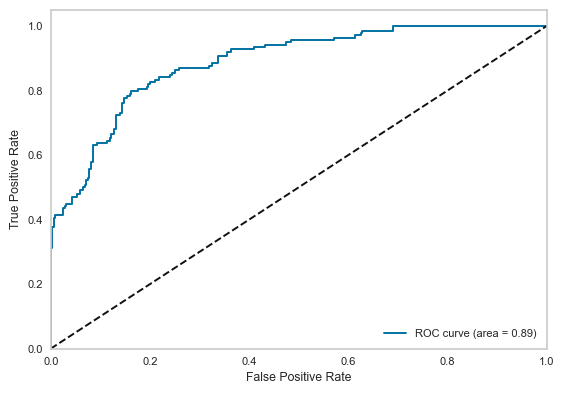

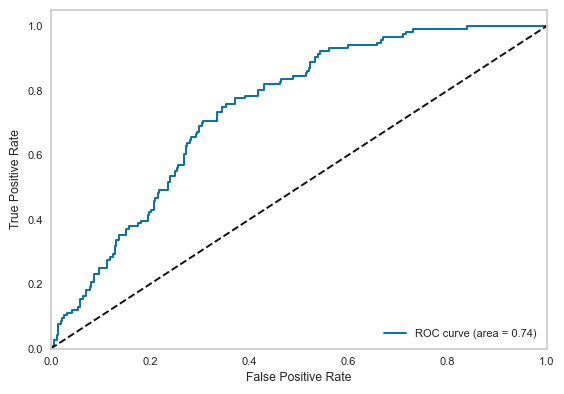

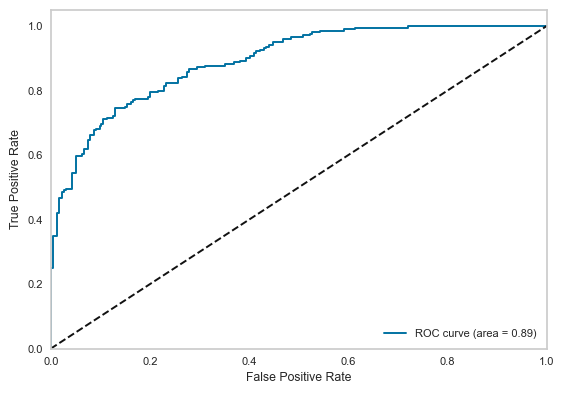

In [1067]:
y_pred_proba = classifier.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(len(classifier.classes_)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()

### Decision tree - with win rate

In [1069]:
#matches_data.head()

In [1070]:
#x_train.head()

In [1071]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [1072]:
param_grid2 = {'max_depth': range(1, 8)}

grid_search2 = GridSearchCV(decision_tree, param_grid2, cv=5, scoring='accuracy')
grid_search2.fit(x_train, y_train)

best_depth=grid_search2.best_params_['max_depth']
best_score=grid_search2.best_score_

best_depth, best_score

(4, 0.6484805169666921)

In [1073]:
decision_tree_2 = DecisionTreeClassifier(random_state=42, max_depth=best_depth)

In [1074]:
model_dt=decision_tree_2.fit(x_train, y_train)
model_dt

DecisionTreeClassifier(max_depth=4, random_state=42)

In [1075]:
y_pred = decision_tree_2.predict(x_test)

In [1076]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

In [1077]:
accuracy

0.6615720524017468

#### Find actual Accuracy via Simulation

In [1079]:
np.random.seed(100)
accuracies_ct=[]
for i in range(5):
    # Split the data with a different random seed
    train, test = train_test_split(matches_data, test_size = 0.2)

    x_train = train.iloc[:,-13:]
    y_train = train[['Outcome']]
    x_test = test.iloc[:,-13:]
    y_test = test[['Outcome']]
    
    # Train and test the model
    decision_tree_2.fit(x_train, np.ravel(y_train))
    y_pred = decision_tree_2.predict(x_test)
    accuracies_ct.append(accuracy_score(y_test, y_pred))
print(f"Average Accuracy: {np.mean(accuracies_ct):.4f}")

Average Accuracy: 0.6410


Text(0.5, 1.0, 'Misclassification Matrix - Win Rate')

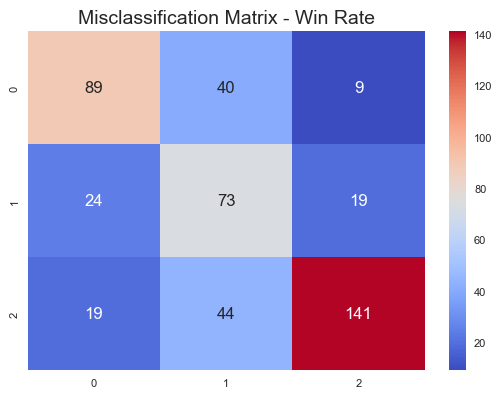

In [1080]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Misclassification Matrix - Win Rate", fontsize=14)

In [1081]:
class_report=pd.DataFrame(class_report)
class_report.head()

,0.0,1.0,2.0,accuracy,macro avg,weighted avg
precision,0.674242,0.464968,0.834320,0.661572,0.657843,0.692539
recall,0.644928,0.629310,0.691176,0.661572,0.655138,0.661572
f1-score,0.659259,0.534799,0.756032,0.661572,0.650030,0.670841
support,138.000000,116.000000,204.000000,0.661572,458.000000,458.000000


Text(0.5, 0, 'Relative Importance')

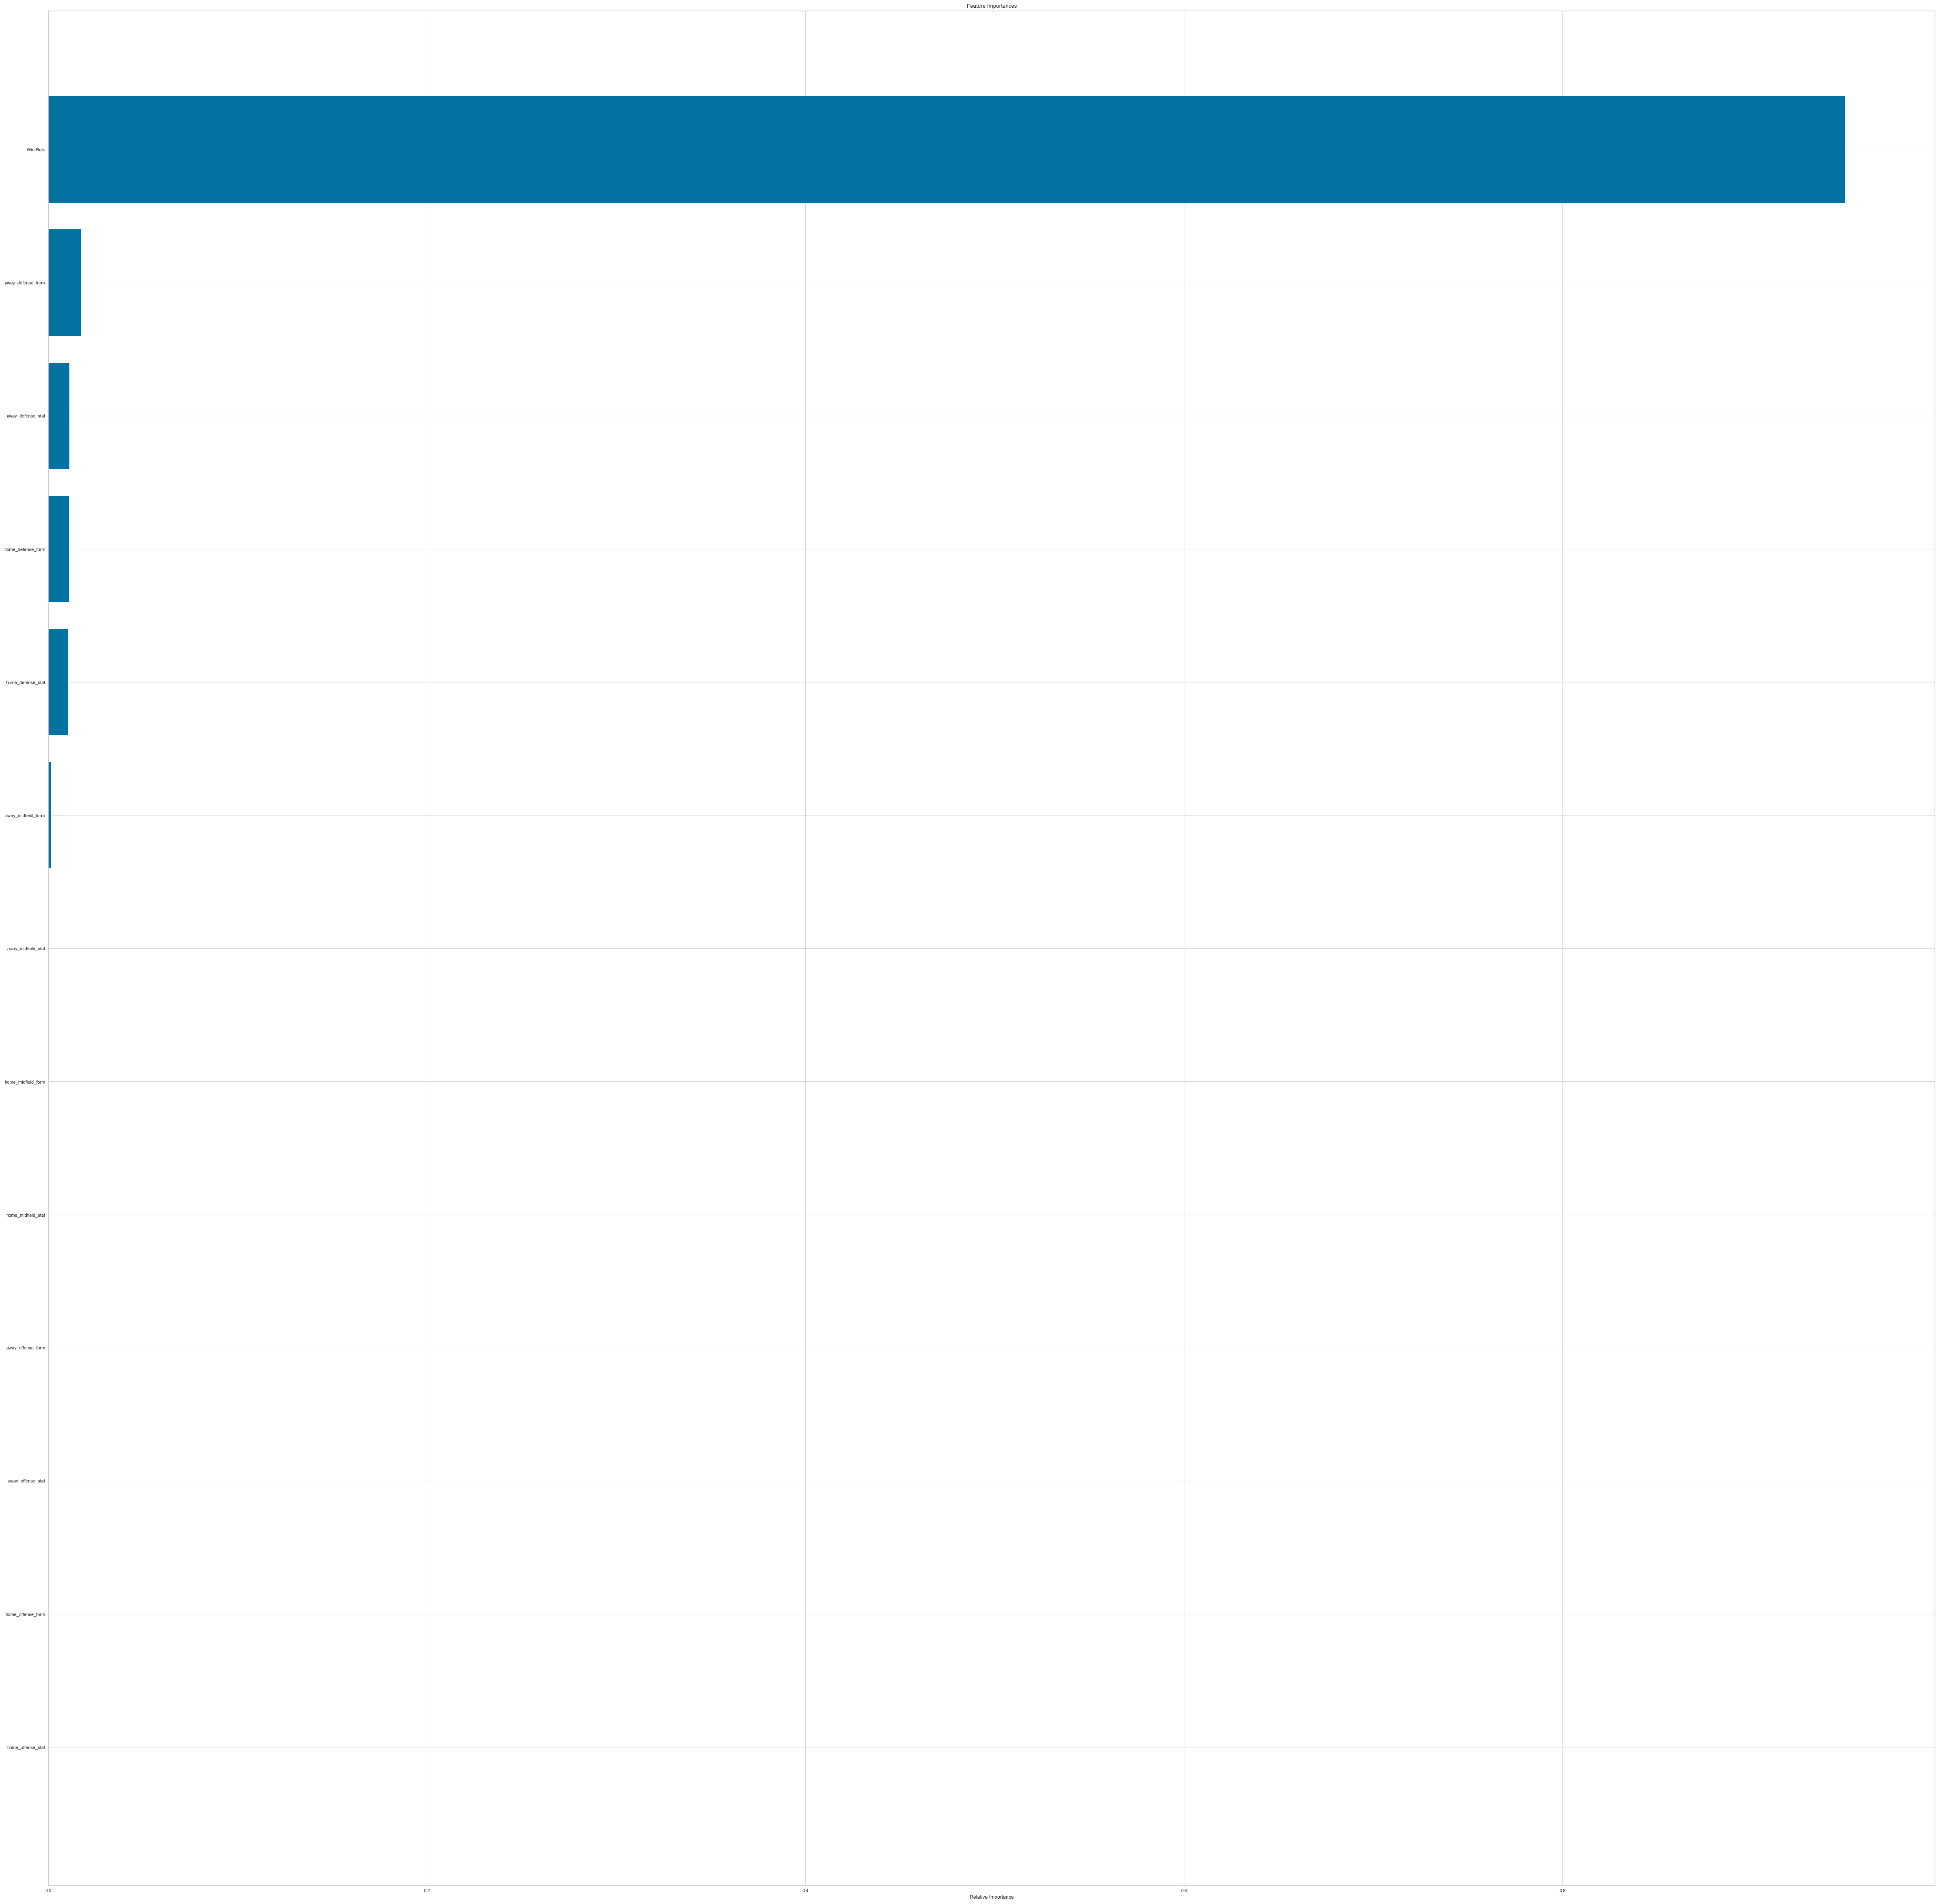

In [1082]:
importances=decision_tree_2.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(60,60))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

### SVM (with Win Rate)

In [1084]:
from sklearn.svm import SVC

In [1085]:
# Set up the model
model_svm = SVC()
model_svm.fit(x_train, y_train)

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

#### Evaluation and Tuning

In [1087]:
predictions_svm = model_svm.predict(x_test)

cm = confusion_matrix(y_test, predictions_svm)
print("Confusion Matrix:")
print(cm)

# Print initial model accuracy
print(f"Initial Model Accuracy: {model_svm.score(x_test, y_test):.2f}")

Confusion Matrix:
[[ 82  21  35]
 [ 26  34  56]
 [ 16  17 171]]
Initial Model Accuracy: 0.63


In [1088]:
# Tuning with Grid Search

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    #'kernel': ['linear', 'rbf', 'sigmoid'],
}

model_svm_tuned = GridSearchCV(estimator=SVC(random_state=1234, probability=True), param_grid=param_grid_svm, verbose=1, cv=10, n_jobs=-1)
model_svm_tuned.fit(x_train, np.ravel(y_train))
print(model_svm_tuned.best_estimator_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
SVC(C=100, gamma=0.001, probability=True, random_state=1234)


#### Evaluate Tuned Model

In [1090]:
predictions_svm_tuned = model_svm_tuned.predict(x_test)

cm_svm_ = confusion_matrix(y_test, predictions_svm)
print("Confusion Matrix:")
print(cm)

# Print initial model accuracy
tuned_acc = model_svm_tuned.score(x_test, y_test)
print(f"Tuned Model Accuracy: {tuned_acc:.2f}")

Confusion Matrix:
[[ 82  21  35]
 [ 26  34  56]
 [ 16  17 171]]
Tuned Model Accuracy: 0.65


#### Find actual Accuracy via Simulation

In [1092]:
np.random.seed(100)
accuracies_svm=[]
for i in range(5):
    # Split the data with a different random seed
    train, test = train_test_split(matches_data, test_size = 0.2)

    x_train = train.iloc[:,-13:]
    y_train = train[['Outcome']]
    x_test = test.iloc[:,-13:]
    y_test = test[['Outcome']]
    
    # Train and test the model
    model_svm_tuned.fit(x_train, np.ravel(y_train))
    y_pred = model_svm_tuned.predict(x_test)
    accuracies_svm.append(accuracy_score(y_test, y_pred))
print(f"Average Accuracy: {np.mean(accuracies_ct):.4f}")

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Average Accuracy: 0.6410


## Running tests without Win Rate

In [1094]:
np.random.seed(100)
# Without win_rate
x_train = train.iloc[:,-13:-1]
y_train = train[['Outcome']]
x_test = test.iloc[:,-13:-1]
y_test = test[['Outcome']]

### Random Forest

#### Fitting the Model

In [1097]:
# Fitting the model
model_rf_2 = RandomForestClassifier(n_estimators=50, max_depth = 4, min_samples_leaf=8, min_samples_split=8)

model_rf_2.fit(x_train,np.ravel(y_train))

RandomForestClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=50)

#### Evaluating the Model and improve for parameters

In [1099]:
# Getting the accuracy
model_rf_2.score(x_test,y_test)

0.5152838427947598

In [1100]:
# Getting the confusion matrix
y_pred = model_rf_2.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

array([[ 62,   4,  72],
       [ 26,   9,  81],
       [ 32,   7, 165]], dtype=int64)

In [1101]:
# Finding the best combination of hyperparamters using Grid Search

parameters = {
     'n_estimators':(20, 50,  100), #the number of trees
     'max_depth':(4,7,10),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12)
}

model_rf_2 = GridSearchCV(RandomForestClassifier(),parameters,cv=3)
model_rf_2.fit(x_train, np.ravel(y_train))
model_rf_2.best_score_, model_rf_2.best_params_

(0.533301136719344,
 {'max_depth': 4,
  'min_samples_leaf': 12,
  'min_samples_split': 2,
  'n_estimators': 50})

#### Find actual Accuracy via Simulation

In [1103]:
np.random.seed(100)
accuracies_rf_2=[]
for i in range(5):
    # Split the data with a different random seed
    train, test = train_test_split(matches_data, test_size = 0.2)

    x_train = train.iloc[:,-13:-1]
    y_train = train[['Outcome']]
    x_test = test.iloc[:,-13:-1]
    y_test = test[['Outcome']]
    
    # Train and test the model
    model_rf_2.fit(x_train, np.ravel(y_train))
    y_pred = model_rf_2.predict(x_test)
    accuracies_rf_2.append(accuracy_score(y_test, y_pred))
print(f"Average Accuracy: {np.mean(accuracies_rf_2):.4f}")

Average Accuracy: 0.5197


Feature Importances

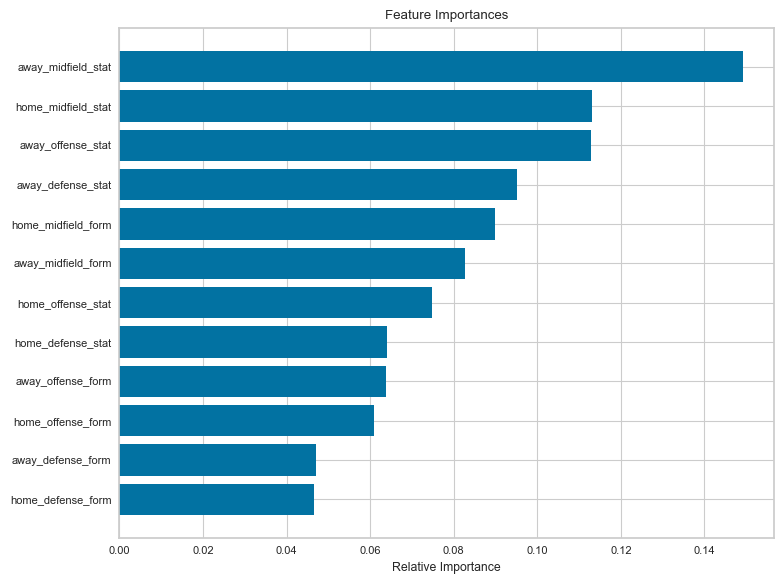

In [1105]:
best_rf_model_2 = model_rf_2.best_estimator_
importances = best_rf_model_2.feature_importances_
feature_names = x_train.columns
indices = np.argsort(importances)
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), np.array(feature_names)[indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

### Neural Network

Base model

In [1108]:
baseline_mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=10000,
    random_state=42,
    early_stopping=True
)

baseline_mlp.fit(x_train,np.ravel(y_train))
print("Trained baseline MLPClassifier.")

y_pred_baseline = baseline_mlp.predict(x_test)
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred_baseline))

Trained baseline MLPClassifier.
Baseline Model Accuracy: 0.4847161572052402


Tuning

In [1110]:
param_dist = {
    'hidden_layer_sizes': [
        (50,), (100,), (150,),
        (50, 50), (100, 50),
        (150, 100, 50), (200, 150, 100)
    ],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive', 'invscaling']
}

mlp = MLPClassifier(
    max_iter=1000000,
    random_state=42,
    early_stopping=True
)


grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_dist,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, np.ravel(y_train))
print("Best Parameters:", grid_search.best_params_)

optimized_mlp = grid_search.best_estimator_
optimized_mlp.fit(x_train, np.ravel(y_train))

y_pred_optimized = optimized_mlp.predict(x_test)
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_optimized))

Fitting 3 folds for each of 126 candidates, totalling 378 fits
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Optimized Model Accuracy: 0.5043668122270742


Confusion matrix

In [1114]:
cfm_optimized = confusion_matrix(y_test, y_pred_optimized)
cfm_optimized

array([[ 58,   8,  64],
       [ 33,  12,  77],
       [ 35,  10, 161]], dtype=int64)

#### Find actual Accuracy via Simulation

In [1116]:
np.random.seed(100)
accuracies_nn_2=[]
for i in range(5):
    # Split the data with a different random seed
    train, test = train_test_split(matches_data, test_size = 0.2)

    x_train = train.iloc[:,-13:-1]
    y_train = train[['Outcome']]
    x_test = test.iloc[:,-13:-1]
    y_test = test[['Outcome']]
    
    # Train and test the model
    optimized_mlp.fit(x_train, np.ravel(y_train))
    y_pred = optimized_mlp.predict(x_test)
    accuracies_nn_2.append(accuracy_score(y_test, y_pred))
print(f"Average Accuracy: {np.mean(accuracies_nn_2):.4f}")

Average Accuracy: 0.5188


### MLP

Model

In [1119]:
classifier = LogisticRegression(random_state=0, multi_class='multinomial')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy and Confusion matrix

In [1121]:
acc2 = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc2)
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy:  0.5458515283842795


array([[ 75,  11,  52],
       [ 35,  16,  65],
       [ 35,  10, 159]], dtype=int64)

#### Find actual Accuracy via Simulation

In [1123]:
np.random.seed(100)
accuracies_mlp_2=[]
for i in range(5):
    # Split the data with a different random seed
    train, test = train_test_split(matches_data, test_size = 0.2)

    x_train = train.iloc[:,-13:-1]
    y_train = train[['Outcome']]
    x_test = test.iloc[:,-13:-1]
    y_test = test[['Outcome']]
    
    # Train and test the model
    classifier.fit(x_train, np.ravel(y_train))
    y_pred = classifier.predict(x_test)
    accuracies_mlp_2.append(accuracy_score(y_test, y_pred))
print(f"Average Accuracy: {np.mean(accuracies_mlp_2):.4f}")

Average Accuracy: 0.5319


Visualizations

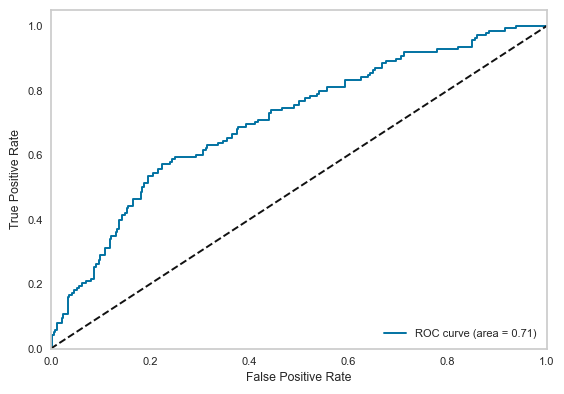

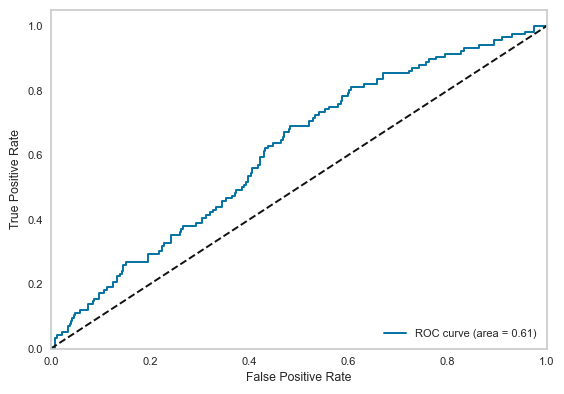

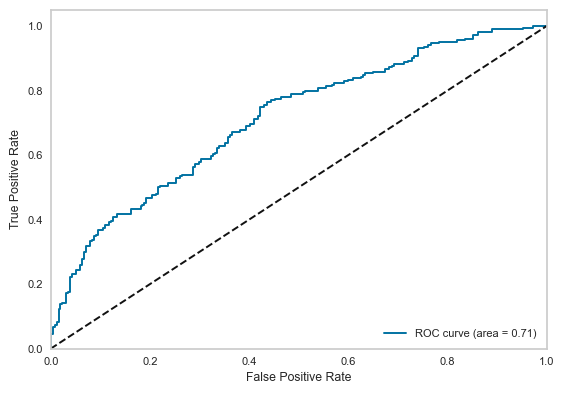

In [1125]:
y_pred_proba = classifier.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(len(classifier.classes_)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()


### Calssification Tree

In [1127]:
decision_tree_nowin = DecisionTreeClassifier(random_state=42)
param_grid_nowin2 = {'max_depth': range(1, 8)}

grid_search_nowin2 = GridSearchCV(decision_tree_nowin, param_grid_nowin2, cv=5, scoring='accuracy')
grid_search_nowin2.fit(x_train, y_train)

best_depth=grid_search_nowin2.best_params_['max_depth']
best_score=grid_search_nowin2.best_score_

best_depth, best_score

(3, 0.5185479668259854)

In [1128]:
decision_tree_nowin_2 = DecisionTreeClassifier(random_state=42, max_depth=best_depth)

decision_tree_nowin_2.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [1129]:
y_pred = decision_tree_nowin_2.predict(x_test)

In [1130]:
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

C:\Users\schue\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\schue\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1131]:
accuracy2

0.5131004366812227

Text(0.5, 1.0, 'Misclassification Matrix - No Win Rate')

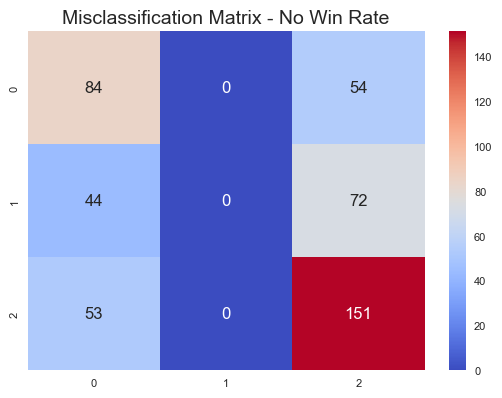

In [1132]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Misclassification Matrix - No Win Rate", fontsize=14)

In [1133]:
class_report=pd.DataFrame(class_report)
class_report.head()

,0.0,1.0,2.0,accuracy,macro avg,weighted avg
precision,0.464088,0.0,0.545126,0.5131,0.336405,0.382642
recall,0.608696,0.0,0.740196,0.5131,0.449631,0.513100
f1-score,0.526646,0.0,0.627859,0.5131,0.384835,0.438341
support,138.000000,116.0,204.000000,0.5131,458.000000,458.000000


#### Find actual Accuracy via Simulation

In [1135]:
np.random.seed(100)
accuracies_ct_2=[]
for i in range(5):
    # Split the data with a different random seed
    train, test = train_test_split(matches_data, test_size = 0.2)

    x_train = train.iloc[:,-13:-1]
    y_train = train[['Outcome']]
    x_test = test.iloc[:,-13:-1]
    y_test = test[['Outcome']]
    
    # Train and test the model
    decision_tree_nowin_2.fit(x_train, np.ravel(y_train))
    y_pred = decision_tree_nowin_2.predict(x_test)
    accuracies_ct_2.append(accuracy_score(y_test, y_pred))
print(f"Average Accuracy: {np.mean(accuracies_ct_2):.4f}")

Average Accuracy: 0.5083


### SVM

In [1137]:
# Set up the model
model_svm = SVC()
model_svm.fit(x_train, np.ravel(y_train))

SVC()

#### Evaluation and Tuning

In [1139]:
predictions_svm = model_svm.predict(x_test)

cm = confusion_matrix(y_test, predictions_svm)
print("Confusion Matrix:")
print(cm)

# Print initial model accuracy
score = model_svm.score(x_test, y_test)
print(f"Initial Model Accuracy: {score:.2f}")

Confusion Matrix:
[[ 65   4  69]
 [ 26   8  82]
 [ 29   5 170]]
Initial Model Accuracy: 0.53


In [1140]:
# Tuning with Grid Search

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    #'kernel': ['linear', 'rbf', 'sigmoid'],
}

model_svm_tuned = GridSearchCV(estimator=SVC(random_state=1234, probability=True), param_grid=param_grid_svm, verbose=1, cv=10, n_jobs=-1)
model_svm_tuned.fit(x_train, np.ravel(y_train))
print(model_svm_tuned.best_estimator_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
SVC(C=1, gamma=0.1, probability=True, random_state=1234)


#### Evaluate Tuned Model

In [1142]:
predictions_svm_tuned = model_svm_tuned.predict(x_test)

cm_svm_ = confusion_matrix(y_test, predictions_svm)
print("Confusion Matrix:")
print(cm)

# Print initial model accuracy
tuned_acc2 = model_svm_tuned.score(x_test, y_test)
print(f"Tuned Model Accuracy: {tuned_acc2:.2f}")

Confusion Matrix:
[[ 65   4  69]
 [ 26   8  82]
 [ 29   5 170]]
Tuned Model Accuracy: 0.53


#### Find actual Accuracy via Simulation

In [1144]:
np.random.seed(100)
accuracies_svm_2=[]
for i in range(5):
    # Split the data with a different random seed
    train, test = train_test_split(matches_data, test_size = 0.2)

    x_train = train.iloc[:,-13:-1]
    y_train = train[['Outcome']]
    x_test = test.iloc[:,-13:-1]
    y_test = test[['Outcome']]
    
    # Train and test the model
    model_svm_tuned.fit(x_train, np.ravel(y_train))
    y_pred = model_svm_tuned.predict(x_test)
    accuracies_svm_2.append(accuracy_score(y_test, y_pred))
print(f"Average Accuracy: {np.mean(accuracies_svm_2):.4f}")

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Average Accuracy: 0.5262


### Accuracy conclusions


In [1147]:
data = {
    "Win Rate": [np.mean(accuracies_mnl), np.mean(accuracies_ct), np.mean(accuracies), np.mean(accuracies_nn), np.mean(accuracies_svm)],
    "No Win Rate": [np.mean(accuracies_mlp_2), np.mean(accuracies_ct_2), np.mean(accuracies_rf_2), np.mean(accuracies_nn_2), np.mean(accuracies_svm_2)],
}
models = ["Multinomial", "Decision Tree", "Random Forest", "Neural Network", "SVM"]

df = pd.DataFrame(data, index=models)
df["Diff"] = np.round(df["Win Rate"] - df["No Win Rate"], 2)

summary = pd.DataFrame({
    "Win Rate": ["", "", "", "", "", "av", "max", "min", "std"],
    "No Win Rate": ["", "", "", "", "", round(df['Diff'].mean(), 2),
                    round(df['Diff'].max(), 2), round(df['Diff'].min(), 2),
                    round(df['Diff'].std(), 2)],
    "Diff": ["", "", "", "", "", "", "", "", ""]
})

final_df = pd.concat([df, summary], axis=0)
final_df

,Win Rate,No Win Rate,Diff
Multinomial,0.639301,0.531878,0.11
Decision Tree,0.641048,0.508297,0.13
Random Forest,0.641048,0.519651,0.12
Neural Network,0.632751,0.518777,0.11
SVM,0.636681,0.526201,0.11
0,,,
1,,,
2,,,
3,,,
4,,,


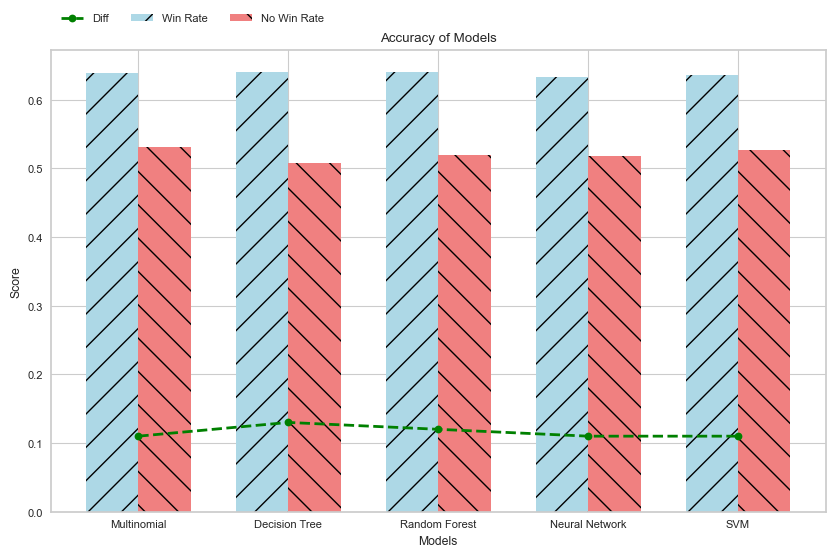

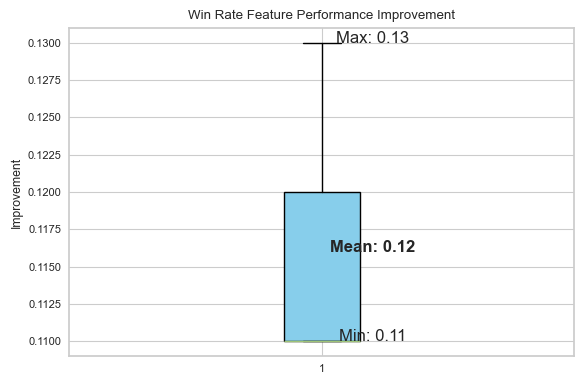

In [1148]:
df = df.reset_index().rename(columns={"index": "Model"})

# Plot 1
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(df))  # Model positions
bar_width = 0.35

ax.bar(x - bar_width/2, df["Win Rate"], bar_width, label="Win Rate", hatch='/', color='lightblue')
ax.bar(x + bar_width/2, df["No Win Rate"], bar_width, label="No Win Rate", hatch='\\', color='lightcoral')
ax.plot(x, df["Diff"], color='green', linestyle='--', linewidth=2, marker='o', label="Diff")

ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Accuracy of Models")
ax.set_xticks(x)
ax.set_xticklabels(df["Model"])
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.1), ncol=3)



# Plot 2
fig, ax = plt.subplots(figsize=(6, 4))

ax.boxplot(df["Diff"], patch_artist=True, boxprops=dict(facecolor="skyblue"))
ax.set_title("Win Rate Feature Performance Improvement")
ax.set_ylabel("Improvement")

mean_diff = df["Diff"].mean()
min_diff = df["Diff"].min()
max_diff = df["Diff"].max()

plt.text(1.1, mean_diff, f"Mean: {mean_diff:.2f}", ha='center', fontweight='bold')
plt.text(1.1, max_diff, f"Max: {max_diff:.2f}", ha='center')
plt.text(1.1, min_diff, f"Min: {min_diff:.2f}", ha='center')

plt.tight_layout()
plt.show()

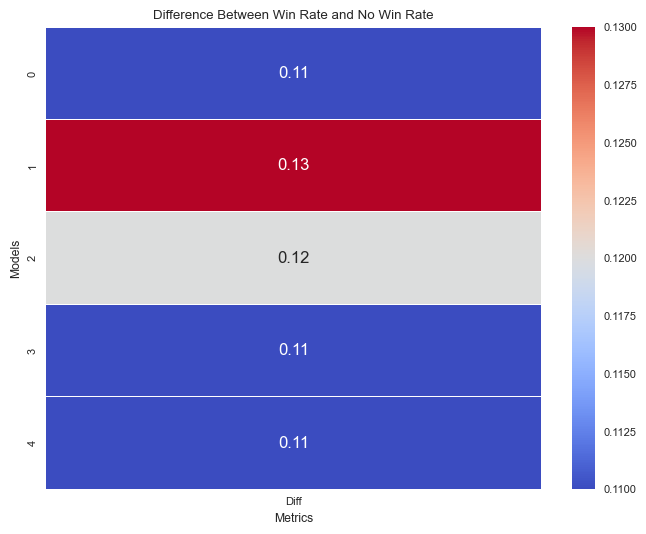

In [1149]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df[["Diff"]], annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Difference Between Win Rate and No Win Rate")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.show()


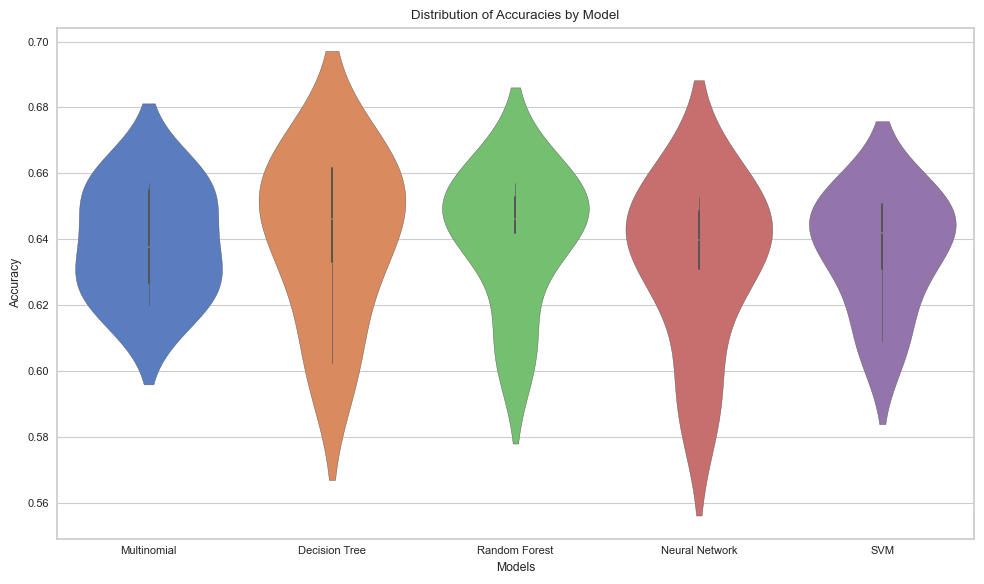

In [1150]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=[accuracies_mnl, accuracies_ct, accuracies, accuracies_nn, accuracies_svm], palette="muted")
plt.xticks(np.arange(len(models)), models)
plt.title("Distribution of Accuracies by Model")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.tight_layout()
plt.show()


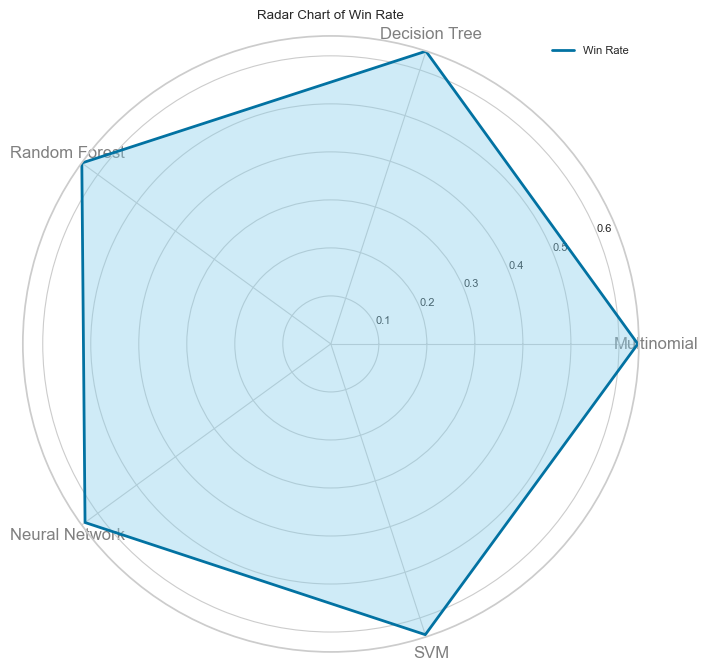

In [1151]:
from math import pi
models = ["Multinomial", "Decision Tree", "Random Forest", "Neural Network", "SVM"]
categories = ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5']

model_data = {
    'Multinomial': accuracies_mnl,
    'Decision Tree': accuracies_ct,
    'Random Forest': accuracies,
    'Neural Network': accuracies_nn,
    'SVM': accuracies_svm
}


num_categories = len(categories)
angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
angles += angles[:1]  # Close the circle

plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

for model, values in model_data.items():
    values += values[:1]  
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.3)

plt.xticks(angles[:-1], categories, color='black', size=12)
plt.title("Model Performance Across Runs", size=16, y=1.1)
plt.yticks([0.3, 0.4, 0.5, 0.6, 0.7], ["0.3", "0.4", "0.5", "0.6", "0.7"], color="grey", size=10)
plt.ylim(0.3, 0.7)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title="Models")

plt.tight_layout()
plt.show()